### TELECOM CHURN CASE STUDY

#### BUSINESS PROBLEM
 - In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 - Retaining high profitable customers is the number one business goal.
 - The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### DATA DICTIONARY
<table>
    <tr><th>Acronyms</th><th>Descriptions</th></tr>
<tr><td>MOBILE_NUMBER</td><td>Customer phone number</td></tr>
<tr><td>CIRCLE_ID</td><td>Telecom circle area to which the customer belongs to</td></tr>
<tr><td>LOC</td><td>Local calls - within same telecom circle</td></tr>
<tr><td>STD</td><td>STD calls - outside the calling circle</td></tr>
<tr><td>IC</td><td>Incoming calls</td></tr>
<tr><td>OG</td><td>Outgoing calls</td></tr>
<tr><td>T2T</td><td>Operator T to T, i.e. within same operator (mobile to mobile)</td></tr>
<tr><td>T2M</td><td>Operator T to other operator mobile</td></tr>
<tr><td>T2O</td><td>Operator T to other operator fixed line</td></tr>
<tr><td>T2F</td><td>Operator T to fixed lines of T</td></tr>
<tr><td>T2C</td><td>Operator T to it’s own call center</td></tr>
<tr><td>ARPU</td><td>Average revenue per user</td></tr>
<tr><td>MOU</td><td>Minutes of usage - voice calls</td></tr>
<tr><td>AON</td><td>Age on network - number of days the customer is using the operator T network</td></tr>
<tr><td>ONNET</td><td>All kind of calls within the same operator network</td></tr>
<tr><td>OFFNET</td><td>All kind of calls outside the operator T network</td></tr>
<tr><td>ROAM</td><td>Indicates that customer is in roaming zone during the call</td></tr>
<tr><td>SPL</td><td>Special calls</td></tr>
<tr><td>ISD</td><td>ISD calls</td></tr>
<tr><td>RECH</td><td>Recharge</td></tr>
<tr><td>NUM</td><td>Number</td></tr>
<tr><td>AMT</td><td>Amount in local currency</td></tr>
<tr><td>MAX</td><td>Maximum</td></tr>
<tr><td>DATA</td><td>Mobile internet</td></tr>
<tr><td>3G</td><td>3G network</td></tr>
<tr><td>AV</td><td>Average</td></tr>
<tr><td>VOL</td><td>Mobile internet usage volume (in MB)</td></tr>
<tr><td>2G</td><td>2G network</td></tr>
<tr><td>PCK</td><td>Prepaid service schemes called - PACKS</td></tr>
<tr><td>NIGHT</td><td>Scheme to use during specific night hours only</td></tr>
<tr><td>MONTHLY</td><td>Service schemes with validity equivalent to a month</td></tr>
<tr><td>SACHET</td><td>Service schemes with validity smaller than a month</td></tr>
<tr><td>*.6</td><td>KPI for the month of June</td></tr>
<tr><td>*.7</td><td>KPI for the month of July</td></tr>
<tr><td>*.8</td><td>KPI for the month of August</td></tr>
<tr><td>*.9</td><td>KPI for the month of September</td></tr>
<tr><td>FB_USER</td><td>Service scheme to avail services of Facebook and similar social networking sites</td></tr>
<tr><td>VBC</td><td>Volume based cost - when no specific scheme is not purchased and paid as per usage</td></tr>
</table>

Now we are going to divide our analysis into different phases,
- Data Filtering
- Data Cleaning
- Data Preparation
- EDA
- Model Building
- Conclusion


In [1]:
#from IPython.display import Image
#Image(filename='C:\\Users\\abhishek\\Desktop\\Upgrad Assignment\\Assignment 5\\FLOW DIAGRAM.png')

### DATA FILTERING

In [2]:
#Importing the necessary libraries
#Import libraries
import pandas as pd
import numpy as np
import warnings
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
#Reading the data from the CSV
telecom = pd.read_csv('telecom_churn_data.csv', sep=',', encoding='ISO-8859-1')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [6]:
#Let's check the columns name of the data imported
telecom.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [7]:
telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
#Let's now find the percentage of the null values in the each of the column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Getting the percentage of null values in each column
#Drop columns with lot of null values as it won't be helpful in our analysis

null_values = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
null_values.loc[null_values > 0]

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

We will start working in different stages. Before we can start cleaning the data we need to filter out the non-required data. <br>
Now as it is mentioned, there phases of the customer lifecycle:
   - Good
   - Action
   - Churn 
<br>Also, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. Also, the analysis has to be performed for the high value customer. So let's get that information on the basis of the information of 6th and 7th month. And then we can get the churn information using the 9th month.

In [9]:
telecom[['av_rech_amt_data_6','av_rech_amt_data_7', 'total_rech_data_6','total_rech_data_7']].head(20)

av_rech_amt_data_6  av_rech_amt_data_7  total_rech_data_6  \
0                252.0               252.0                1.0   
1                  NaN               154.0                NaN   
2                  NaN                 NaN                NaN   
3                  NaN                 NaN                NaN   
4                 56.0                 NaN                1.0   
5                  NaN                 NaN                NaN   
6                  NaN                 NaN                NaN   
7                  NaN                 NaN                NaN   
8                  NaN               177.0                NaN   
9                  NaN               154.0                NaN   
10                 NaN                 NaN                NaN   
11                 NaN                 NaN                NaN   
12                 NaN                 NaN                NaN   
13                 NaN                 NaN                NaN   
14                 NaN                 NaN                NaN   
15                 NaN                 NaN                NaN   
16                 NaN                 NaN                NaN   
17                 NaN                 NaN                NaN   
18                 NaN                 NaN                NaN   
19               154.0               154.0                1.0   

    total_rech_data_7  
0                 1.0  
1                 1.0  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 2.0  
9                 1.0  
10                NaN  
11                NaN  
12                NaN  
13                NaN  
14                NaN  
15                NaN  
16                NaN  
17                NaN  
18                NaN  
19                1.0

If you watch closely, you can actually see a pattern here, when <b>av_rech_amt_data_6</b> is null then <b>total_rech_data_6</b> is null as well. The same pattern can be seen for the columns of other months as well. So essentially we can replace all the null values in these column with zero and our data should remain unaffected.

In [10]:
#Replacing the value of the null in the average and total recharge amount to 0.
columnList = ['av_rech_amt_data_6','total_rech_data_6',
              'av_rech_amt_data_7','total_rech_data_7',
              'av_rech_amt_data_8','total_rech_data_8', 
              'av_rech_amt_data_9','total_rech_data_9']

#Let's replace the above values with zero
telecom[columnList] = telecom[columnList].fillna(0, axis=1)

#Let's print the data again to check if the values have been replaced correctly.
telecom[columnList].head(20)

#Great the values have been replaced correctly

av_rech_amt_data_6  total_rech_data_6  av_rech_amt_data_7  \
0                252.0                1.0               252.0   
1                  0.0                0.0               154.0   
2                  0.0                0.0                 0.0   
3                  0.0                0.0                 0.0   
4                 56.0                1.0                 0.0   
5                  0.0                0.0                 0.0   
6                  0.0                0.0                 0.0   
7                  0.0                0.0                 0.0   
8                  0.0                0.0               177.0   
9                  0.0                0.0               154.0   
10                 0.0                0.0                 0.0   
11                 0.0                0.0                 0.0   
12                 0.0                0.0                 0.0   
13                 0.0                0.0                 0.0   
14                 0.0                0.0                 0.0   
15                 0.0                0.0                 0.0   
16                 0.0                0.0                 0.0   
17                 0.0                0.0                 0.0   
18                 0.0                0.0                 0.0   
19               154.0                1.0               154.0   

    total_rech_data_7  av_rech_amt_data_8  total_rech_data_8  \
0                 1.0               252.0                1.0   
1                 1.0                50.0                2.0   
2                 0.0                 0.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   
5                 0.0                 0.0                0.0   
6                 0.0                 0.0                0.0   
7                 0.0                 0.0                0.0   
8                 2.0                69.0                3.0   
9                 1.0                 0.0                0.0   
10                0.0                34.0                2.0   
11                0.0               154.0                1.0   
12                0.0                 0.0                0.0   
13                0.0                69.0                3.0   
14                0.0                 0.0                0.0   
15                0.0                 0.0                0.0   
16                0.0                 0.0                0.0   
17                0.0                 0.0                0.0   
18                0.0                 0.0                0.0   
19                1.0               274.0                1.0   

    av_rech_amt_data_9  total_rech_data_9  
0                  0.0                0.0  
1                  0.0                0.0  
2                 46.0                1.0  
3                  0.0                0.0  
4                  0.0                0.0  
5                  0.0                0.0  
6                  0.0                0.0  
7                  0.0                0.0  
8                  0.0                0.0  
9                  0.0                0.0  
10                17.0                1.0  
11                 0.0                0.0  
12                 0.0                0.0  
13                 0.0                0.0  
14                 0.0                0.0  
15                 0.0                0.0  
16                 0.0                0.0  
17                 0.0                0.0  
18                 0.0                0.0  
19                 0.0                0.0

In [11]:
#Let's start filtering out the top customers

telecom['total_data_rech_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['amount_6'] = telecom[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom['amount_7'] = telecom[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)
telecom['average_amount_6_7'] = telecom[['amount_6','amount_7']].mean(axis=1)

In [12]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

Now the case lists out the below guidelines to filter out the high-value customers,<br>
<i>As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). </i>

In [13]:
high_value_customer = telecom[(telecom['average_amount_6_7']> telecom['average_amount_6_7'].quantile(0.7))]

In [14]:
high_value_customer.shape

#As per the case, we should have around 29.9k rows of the high value customers. 
#We have that. So great!

#This will be our final filtered dataset on which we will perform rest of the operations

(29953, 231)

In [15]:
#Let's define a unique column 'churn' which will classify the user as churned or not based on the below factors
#User is classified as churned or not on the basis of the below factors,
#    - vol_3g_mb_9
#    - vol_2g_mb_9
#    - total_ic_mou_9
#    - total_og_mou_9

high_value_customer['churn']=high_value_customer[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [16]:
#Now let's understand the ratio of the churn to non-churn values
high_value_customer['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [17]:
#Let's also get the numbers in the percentage to get a better understanding
high_value_customer['churn'].value_counts() * 100/high_value_customer.shape[0]

0    91.877274
1     8.122726
Name: churn, dtype: float64

Wow! So <b>92%</b> of the values are <b>not-churned</b> whereas only <b>~8%</b> of the values are <b>churned</b>.

Now we have finished our Data Filtering phase. Let's move on to Data cleaning phase.
### DATA CLEANING

In [18]:
#Now the first thing we can do in data cleaning is remove all the columns of 9th month since it is of no use to us
month_9_cols = [col for col in high_value_customer.columns if '9' in col]
high_value_customer = high_value_customer.drop(month_9_cols, axis=1)

high_value_customer.info(verbose = 1)
#Great! Doing this we have reduced the number of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 178 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

#Mobile number isn't actually of any use to us for the analysis part. Let's drop it
high_value_customer = high_value_customer.drop('mobile_number', axis=1)

In [19]:
null_values = round(100*(high_value_customer.isnull().sum()/len(high_value_customer.index)), 2)
null_values.loc[null_values > 0]

loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_7         0.09
last_date_of_month_8         0.55
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6  

Now since the number of the records are filtered out, the number of null values in some of the columns are reduced from 70+ percentage to 40+ percentage.

<table>
    <tr>
        <td>date_of_last_rech_data_6</td>
        <td>max_rech_data_6</td>
        <td>count_rech_2g_6</td>
        <td>count_rech_3g_6</td>
        <td>arpu_3g_6</td>
        <td>arpu_2g_6</td>
        <td>night_pck_user_6</td>
        <td>fb_user_6</td>
        <td>44.11%</td>
    </tr>
    <tr>
        <td>date_of_last_rech_data_7</td>
        <td>max_rech_data_7</td>
        <td>count_rech_2g_7</td>
        <td>count_rech_3g_7</td>
        <td>arpu_3g_7</td>
        <td>arpu_2g_7</td>
        <td>night_pck_user_7</td>
        <td>fb_user_7</td>
        <td>43.12%</td>
    </tr>
    <tr>
        <td>date_of_last_rech_data_8</td>
        <td>max_rech_data_8</td>
        <td>count_rech_2g_8</td>
        <td>count_rech_3g_8</td>
        <td>arpu_3g_8</td>
        <td>arpu_2g_8</td>
        <td>night_pck_user_8</td>
        <td>fb_user_8</td>
        <td>46.80%</td>
    </tr>
</table>

Look at the pattern. We can essentially drop these column. But for predictive modelling we don't want to further reduce the data since it will affect the minority churn. Let us first understand the ratio of churn to not churn. This step is essential before we remove the null values.

#### DERIVE THE CHURN COLUMN

In [20]:
#Let's also get the numbers in the percentage to get a better understanding
high_value_customer['churn'].value_counts() * 100/high_value_customer.shape[0]

0    91.877274
1     8.122726
Name: churn, dtype: float64

Text(0.5, 1.0, 'Churn - distribution')

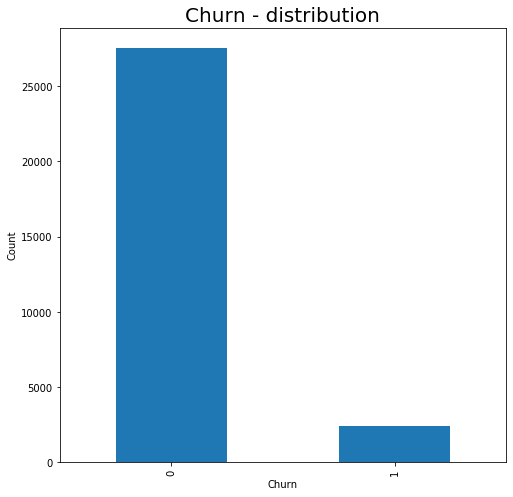

In [21]:
#Let us plot the churn distribution to better the churn column
plt.figure(figsize=(8,8))
high_value_customer['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn')
plt.title('Churn - distribution',fontsize=20)

Wow! So <b>92%</b> of the values are <b>not-churned</b> whereas only <b>~8%</b> of the values are <b>churned</b>. So dropping the null values which we looked at earlier would significantly affect the minority class.

Now, if you see the missing data pattern, we can conclude that user didn't buy the data pack that month and hence we are looking at no-activity in those columns. <br>
<b> Confusion: </b> Now I can mark the rest of the columns as 0 but can the date column even be imputed? If so what date will it take? It doesn't make sense as business case as well. </br>
Let's come back to this later.

<b><i>Date of recharge either call or data is just telling me one thing. Which is whether the recharge was made that month or not. Other than that I don't see any use for the date column. Let let's do one thing, if the date is present in the recharge column, let's have a value of 1 as a flag or let it be zero.</i></b>

In [22]:
date_recharge_column_list = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
high_value_customer[['recharge_call_flag_6','recharge_call_flag_7','recharge_call_flag_8','recharge_data_flag_6','recharge_data_flag_7','recharge_data_flag_8']] = high_value_customer[date_recharge_column_list].applymap(lambda x: 0 if pd.isnull(x) else 1)

#Let's have a look at newly formed column
high_value_customer[['recharge_call_flag_6','recharge_call_flag_7','recharge_call_flag_8','recharge_data_flag_6','recharge_data_flag_7','recharge_data_flag_8']].head(10)

recharge_call_flag_6  recharge_call_flag_7  recharge_call_flag_8  \
0                      1                     1                     1   
7                      1                     1                     1   
8                      1                     1                     1   
21                     1                     1                     1   
23                     1                     1                     1   
33                     1                     1                     1   
38                     1                     1                     1   
41                     1                     1                     1   
48                     1                     1                     1   
53                     1                     1                     1   

    recharge_data_flag_6  recharge_data_flag_7  recharge_data_flag_8  
0                      1                     1                     1  
7                      0                     0                     0  
8                      0                     1                     1  
21                     0                     0                     0  
23                     0                     1                     1  
33                     1                     1                     1  
38                     0                     0                     0  
41                     0                     0                     0  
48                     0                     0                     0  
53                     1                     1                     1

In [23]:
#Alright, so apart from the date of the last recharge, we can impute the null values of the rest of the columns to zero.
column_list_impute = ['max_rech_data_6','count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6',
                      'max_rech_data_7','count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7',
                      'max_rech_data_8','count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8'
                     ]

high_value_customer[column_list_impute] = high_value_customer[column_list_impute].fillna(0, axis=1)

In [24]:
null_values = round(100*(high_value_customer.isnull().sum()/len(high_value_customer.index)), 2)
null_values.loc[null_values > 0]

loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_7         0.09
last_date_of_month_8         0.55
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6  

If you look closely, we are looking at a pattern here. The pattern can be grouped as below.

<table>
    <tr>
        <td>1.81%</td><td>onnet_mou_6</td><td>offnet_mou_6</td><td>roam_ic_mou_6</td><td>roam_og_mou_6</td><td>loc_og_t2t_mou_6</td><td>loc_og_t2m_mou_6</td><td>loc_og_t2f_mou_6</td><td>loc_og_t2c_mou_6</td><td>loc_og_mou_6</td><td>std_og_t2t_mou_6</td><td>std_og_t2m_mou_6</td><td>std_og_t2f_mou_6</td><td>std_og_t2c_mou_6</td><td>std_og_mou_6</td><td>isd_og_mou_6</td><td>spl_og_mou_6</td><td>og_others_6</td><td>loc_ic_t2t_mou_6</td><td>loc_ic_t2m_mou_6</td><td>loc_ic_t2f_mou_6</td><td>loc_ic_mou_6</td><td>std_ic_t2t_mou_6</td><td>std_ic_t2m_mou_6</td><td>std_ic_t2f_mou_6</td><td>std_ic_t2o_mou_6</td><td>std_ic_mou_6</td><td>spl_ic_mou_6</td><td>isd_ic_mou_6</td><td>ic_others_6</td>
    </tr>
    <tr>
        <td>1.79%</td><td>onnet_mou_7</td><td>offnet_mou_7</td><td>roam_ic_mou_7</td><td>roam_og_mou_7</td><td>loc_og_t2t_mou_7</td><td>loc_og_t2m_mou_7</td><td>loc_og_t2f_mou_7</td><td>loc_og_t2c_mou_7</td><td>loc_og_mou_7</td><td>std_og_t2t_mou_7</td><td>std_og_t2m_mou_7</td><td>std_og_t2f_mou_7</td><td>std_og_t2c_mou_7</td><td>std_og_mou_7</td><td>isd_og_mou_7</td><td>spl_og_mou_7</td><td>og_others_7</td><td>loc_ic_t2t_mou_7</td><td>loc_ic_t2m_mou_7</td><td>loc_ic_t2f_mou_7</td><td>loc_ic_mou_7</td><td>std_ic_t2t_mou_7</td><td>std_ic_t2m_mou_7</td><td>std_ic_t2f_mou_7</td><td>std_ic_t2o_mou_7</td><td>std_ic_mou_7</td><td>spl_ic_mou_7</td><td>isd_ic_mou_7</td><td>ic_others_7</td>
    </tr>
    <tr>
        <td>3.91%</td><td>onnet_mou_8</td><td>offnet_mou_8</td><td>roam_ic_mou_8</td><td>roam_og_mou_8</td><td>loc_og_t2t_mou_8</td><td>loc_og_t2m_mou_8</td><td>loc_og_t2f_mou_8</td><td>loc_og_t2c_mou_8</td><td>loc_og_mou_8</td><td>std_og_t2t_mou_8</td><td>std_og_t2m_mou_8</td><td>std_og_t2f_mou_8</td><td>std_og_t2c_mou_8</td><td>std_og_mou_8</td><td>isd_og_mou_8</td><td>spl_og_mou_8</td><td>og_others_8</td><td>loc_ic_t2t_mou_8</td><td>loc_ic_t2m_mou_8</td><td>loc_ic_t2f_mou_8</td><td>loc_ic_mou_8</td><td>std_ic_t2t_mou_8</td><td>std_ic_t2m_mou_8</td><td>std_ic_t2f_mou_8</td><td>std_ic_t2o_mou_8</td><td>std_ic_mou_8</td><td>spl_ic_mou_8</td><td>isd_ic_mou_8</td><td>ic_others_8</td>
    </tr>
</table>

In [25]:
#Let's replace the null values in the above columns with 0
column_list_impute = ['onnet_mou_6','offnet_mou_6','roam_ic_mou_6','roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6',
                    'onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_t2c_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_t2o_mou_7','std_ic_mou_7','spl_ic_mou_7','isd_ic_mou_7','ic_others_7',
                    'onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','ic_others_8'  
                     ]

high_value_customer[column_list_impute] = high_value_customer[column_list_impute].fillna(0, axis=1)

In [26]:
null_values = round(100*(high_value_customer.isnull().sum()/len(high_value_customer.index)), 2)
null_values.loc[null_values > 0]

loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_7         0.09
last_date_of_month_8         0.55
date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

In [27]:
#We can easily replace the last date of the month as below
high_value_customer['last_date_of_month_7'] = high_value_customer['last_date_of_month_7'].fillna('7/31/2014')
high_value_customer['last_date_of_month_8'] = high_value_customer['last_date_of_month_8'].fillna('8/31/2014')

In [28]:
null_values = round(100*(high_value_customer.isnull().sum()/len(high_value_customer.index)), 2)
null_values.loc[null_values > 0]

loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

In [29]:
# Now we see that loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou all have the same number of null values.
high_value_customer[pd.isnull(high_value_customer['loc_og_t2o_mou'])]

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
687       7001662284        109             NaN             NaN   
2185      7000237332        109             NaN             NaN   
3154      7000606599        109             NaN             NaN   
4190      7000293582        109             NaN             NaN   
5175      7002074759        109             NaN             NaN   
5220      7000635396        109             NaN             NaN   
5539      7001126462        109             NaN             NaN   
6393      7002026764        109             NaN             NaN   
6567      7001848388        109             NaN             NaN   
6946      7002368732        109             NaN             NaN   
6984      7001738538        109             NaN             NaN   
8265      7000144821        109             NaN             NaN   
8363      7000604685        109             NaN             NaN   
8975      7000822092        109             NaN             NaN   
9518      7002391910        109             NaN             NaN   
9852      7000969482        109             NaN             NaN   
10879     7001588698        109             NaN             NaN   
11364     7000746562        109             NaN             NaN   
11626     7000145218        109             NaN             NaN   
12154     7000977670        109             NaN             NaN   
12996     7000452408        109             NaN             NaN   
13039     7001097628        109             NaN             NaN   
13289     7000801224        109             NaN             NaN   
13351     7000648567        109             NaN             NaN   
14191     7001546710        109             NaN             NaN   
14458     7001731526        109             NaN             NaN   
15294     7000017705        109             NaN             NaN   
15473     7000041735        109             NaN             NaN   
15858     7000604772        109             NaN             NaN   
17752     7000517729        109             NaN             NaN   
17968     7001135323        109             NaN             NaN   
19071     7000804932        109             NaN             NaN   
19354     7000717449        109             NaN             NaN   
19415     7000164130        109             NaN             NaN   
19531     7000200593        109             NaN             NaN   
19564     7000455953        109             NaN             NaN   
19971     7001962890        109             NaN             NaN   
20780     7001881970        109             NaN             NaN   
20907     7001590745        109             NaN             NaN   
21030     7001924905        109             NaN             NaN   
21259     7002198903        109             NaN             NaN   
21611     7000508232        109             NaN             NaN   
21925     7001601621        109             NaN             NaN   
22781     7000441141        109             NaN             NaN   
23278     7001591982        109             NaN             NaN   
24091     7001037390        109             NaN             NaN   
25471     7001101668        109             NaN             NaN   
25599     7002408423        109             NaN             NaN   
25647     7000121522        109             NaN             NaN   
26622     7000404584        109             NaN             NaN   
26902     7000603259        109             NaN             NaN   
28350     7001975086        109             NaN             NaN   
29404     7001786503        109             NaN             NaN   
30524     7002159687        109             NaN             NaN   
31024     7001238664        109             NaN             NaN   
31058     7000447866        109             NaN             NaN   
31602     7000365381        109             NaN             NaN   
33018     7001385743        109             NaN             NaN   
33036     7000800656        109             NaN       

In [30]:
#Over here we see that all of them are null at the same time. Let's impute them with 0
column_list_impute = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
high_value_customer[column_list_impute] = high_value_customer[column_list_impute].fillna(0, axis=1)

In [31]:
null_values = round(100*(high_value_customer.isnull().sum()/len(high_value_customer.index)), 2)
null_values.loc[null_values > 0]

date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
date_of_last_rech_data_8    46.80
dtype: float64

That concludes the data cleaning phase.

<b>Note: I have kept the data columns as I am not really sure if we need it or not. Later, if we don't need it we can remove the date columns.</b>

### EXPLORATORY DATA ANALYSIS
Let's perform a univariate analysis on the categorical variables.

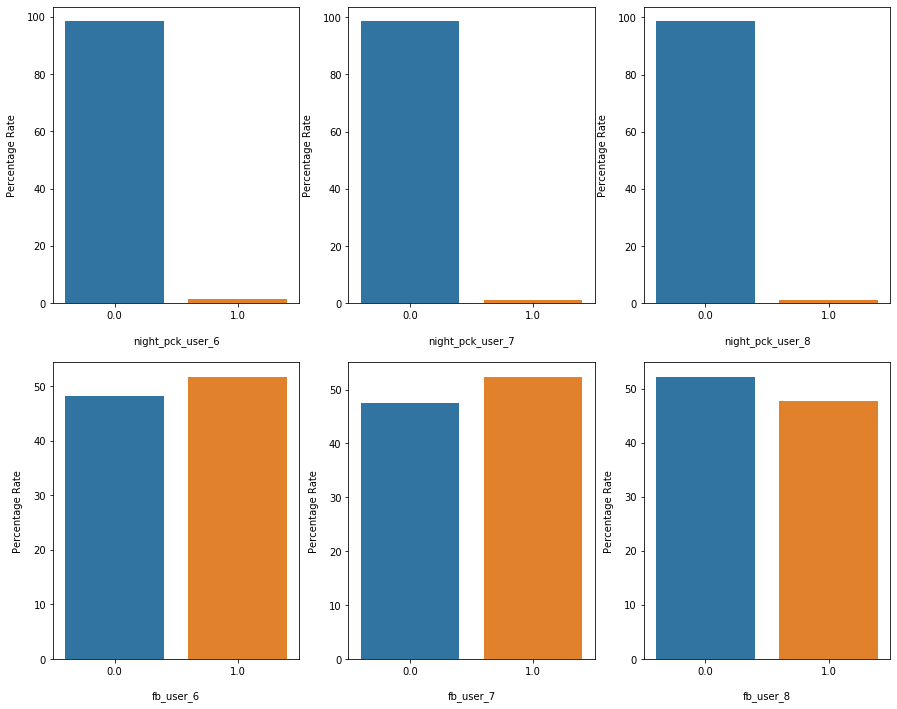

In [32]:
#Category list is as below
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

plt.figure(figsize = (15, 12))
counter = 1
for col_list in category_list:
        
    series = round(((high_value_customer[col_list].value_counts())/(len(high_value_customer[col_list])) * 100), 2)
    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    counter += 1
plt.show()

We are going to have a look at correlation between different variables later (Since we are yet to deal with the null values in the dates). So let's understand the plots between different variables and the churn column.

In [33]:
def plot_variables(variable_list):
    sns.pairplot(data=high_value_customer[variable_list],hue='churn', diag_kws={'bw': 1.5})
    #Now I was facing the error while displaying the plots.
    #Error: 'RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.'
    #Let us now try something I found over stackoverflow
    #https://stackoverflow.com/questions/60596102/seaborn-selected-kde-bandwidth-is-0-cannot-estimate-density
    #Adding this 'diag_kws={'bw': 1.5}' to pairplot solved the issue for me

In [34]:
high_value_customer.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 184 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

Now we are going to understand the pair plot between the different variables. They are listed as below,
 - arpu
 - onnet_mou
 - offnet_mou
 - roam_ic_mou
 - loc_og_mou
 - std_og_mou
 - isd_og_mou
 - total_og_mou
 - loc_ic_mou
 - std_ic_mou
 - total_ic_mou
 - total_rech_num
 - total_rech_amt
 - total_rech_data
 - vol_2g_mb
 - vol_3g_mb
 - vbc_3g

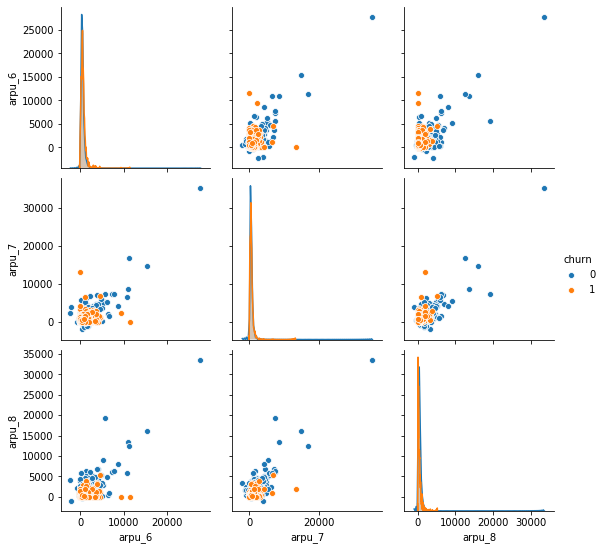

In [35]:
plot_variables(['arpu_6', 'arpu_7', 'arpu_8', 'churn'])

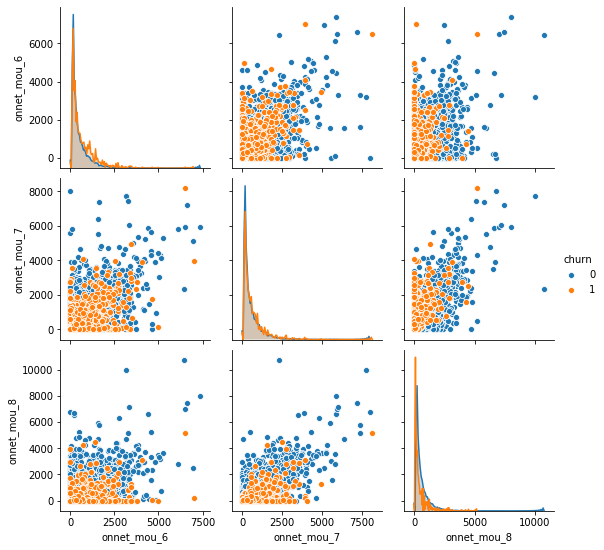

In [36]:
plot_variables(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'churn'])

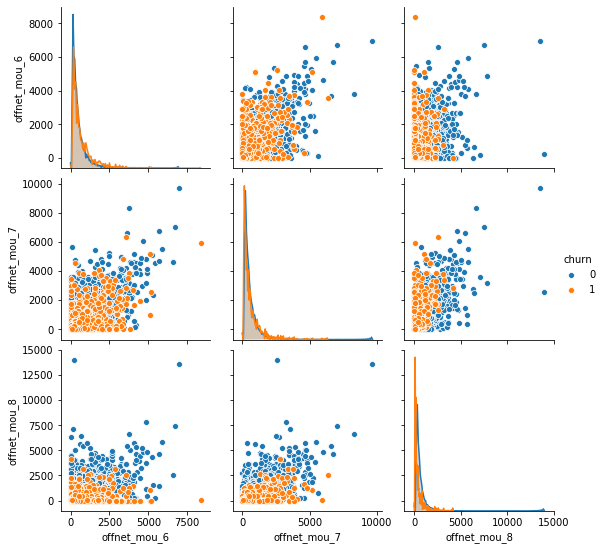

In [37]:
plot_variables(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'churn'])

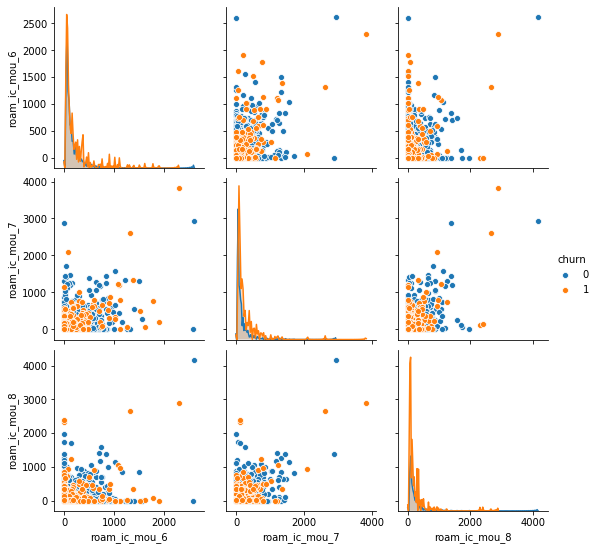

In [38]:
plot_variables(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'churn'])

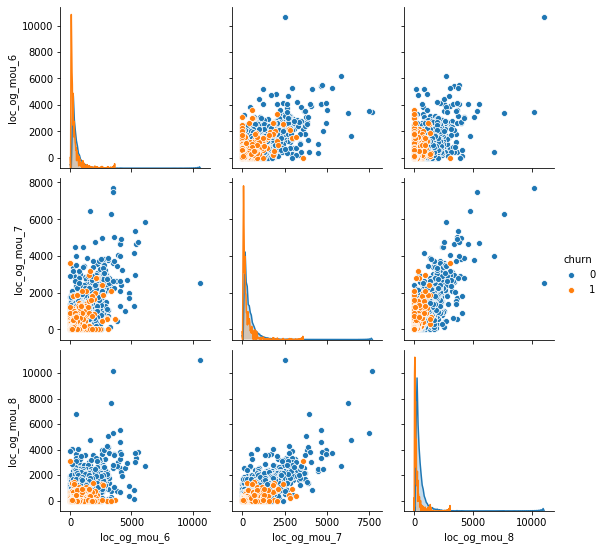

In [39]:
plot_variables(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8', 'churn'])

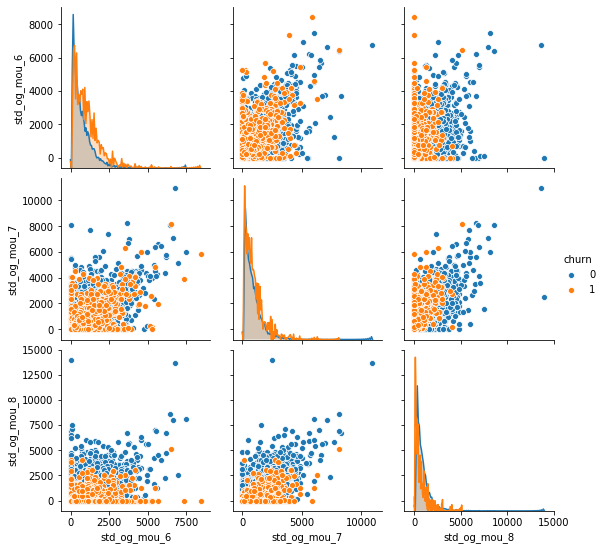

In [40]:
plot_variables(['std_og_mou_6','std_og_mou_7','std_og_mou_8', 'churn'])

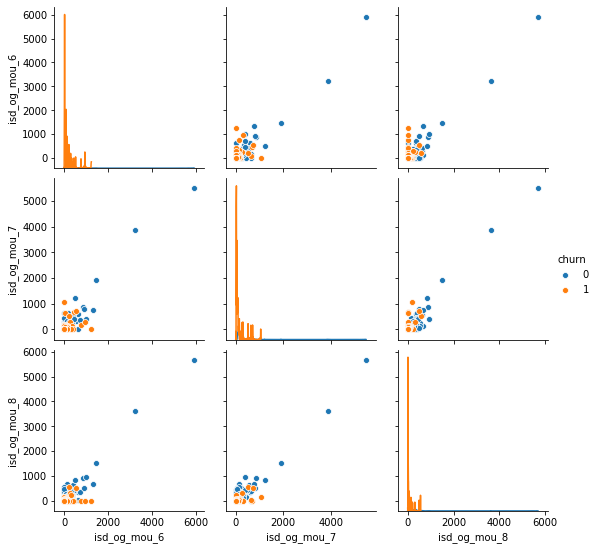

In [41]:
plot_variables(['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8', 'churn'])

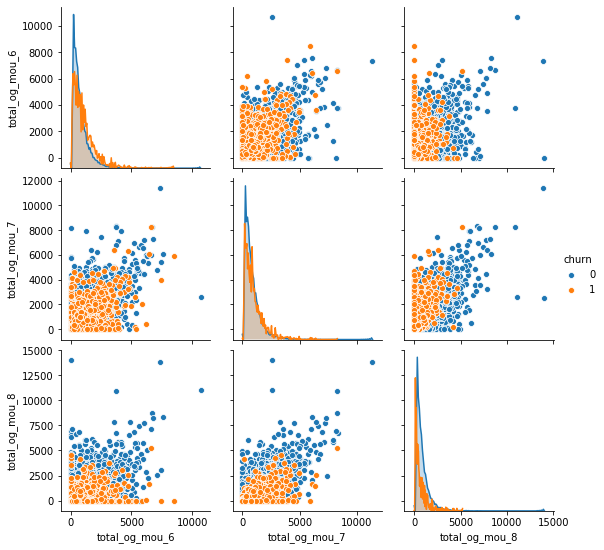

In [42]:
plot_variables(['total_og_mou_6','total_og_mou_7','total_og_mou_8', 'churn'])

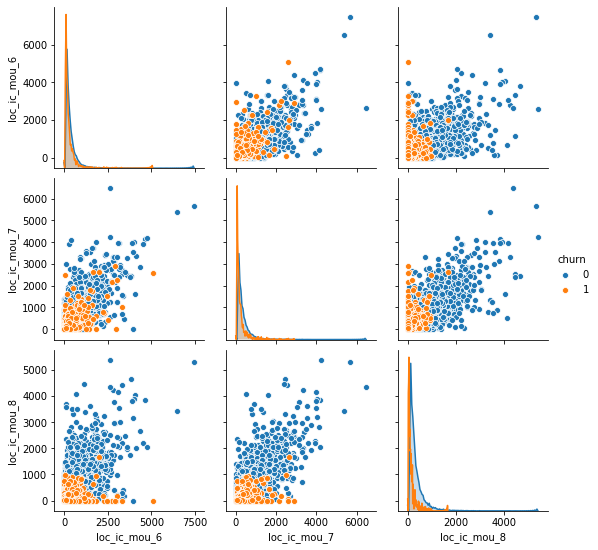

In [43]:
plot_variables(['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8', 'churn'])

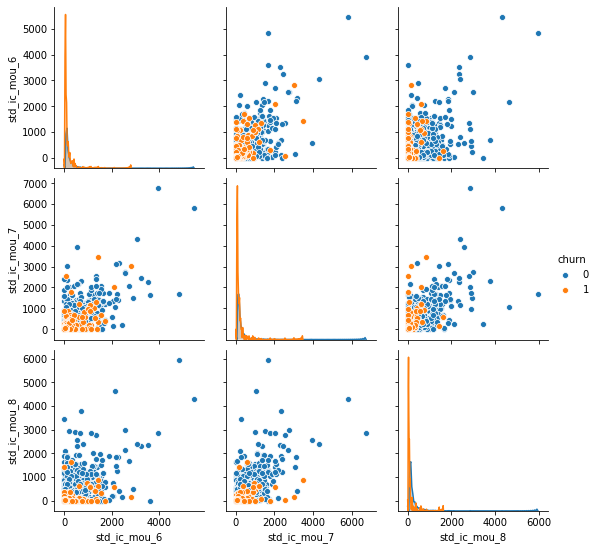

In [44]:
plot_variables(['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8', 'churn'])

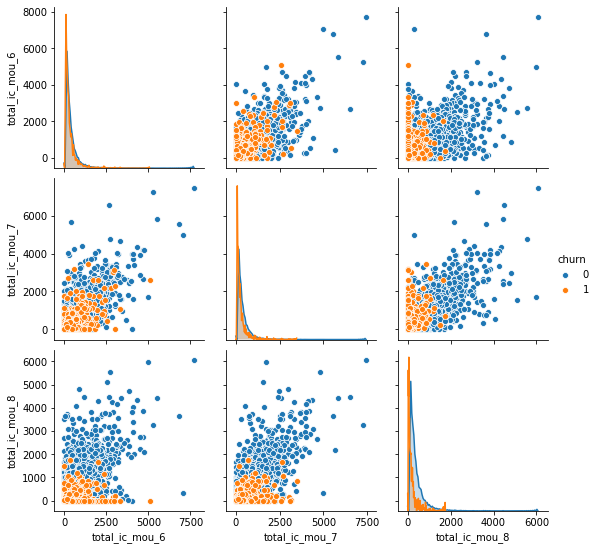

In [45]:
plot_variables(['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8', 'churn'])

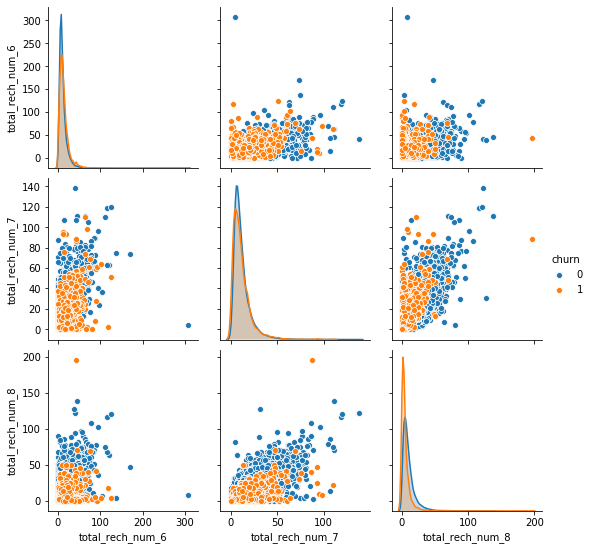

In [46]:
plot_variables(['total_rech_num_6','total_rech_num_7','total_rech_num_8', 'churn'])

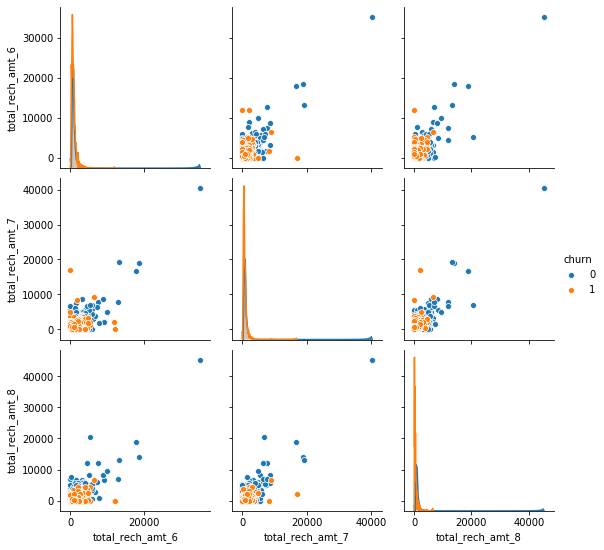

In [47]:
plot_variables(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8', 'churn'])

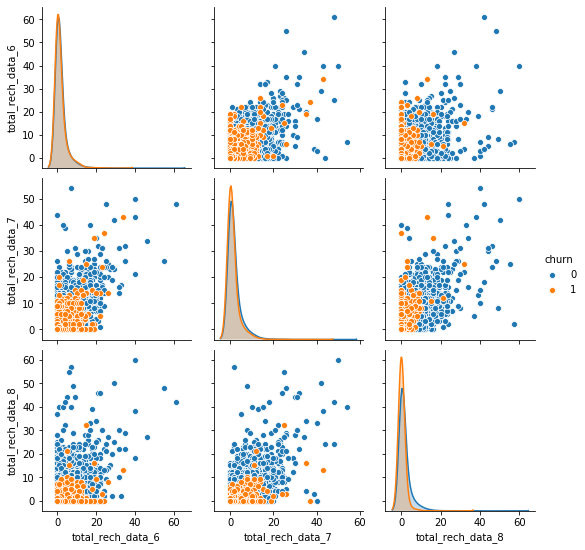

In [48]:
plot_variables(['total_rech_data_6','total_rech_data_7','total_rech_data_8', 'churn'])

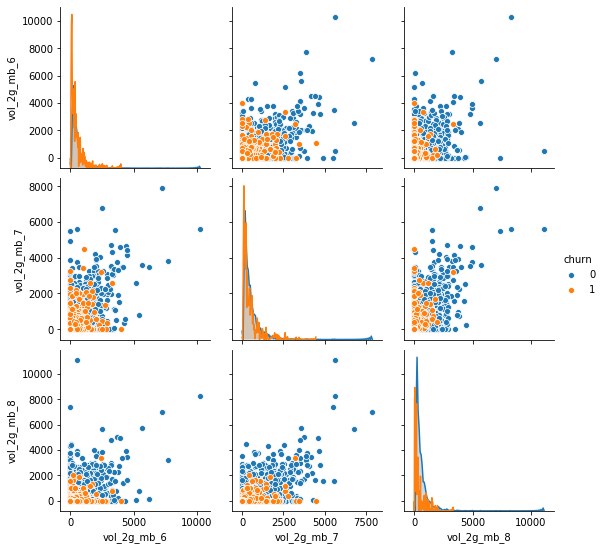

In [49]:
plot_variables(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8', 'churn'])

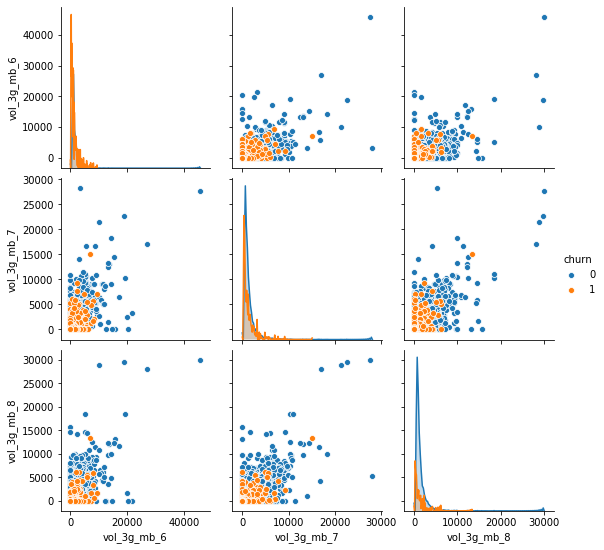

In [50]:
plot_variables(['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8', 'churn'])

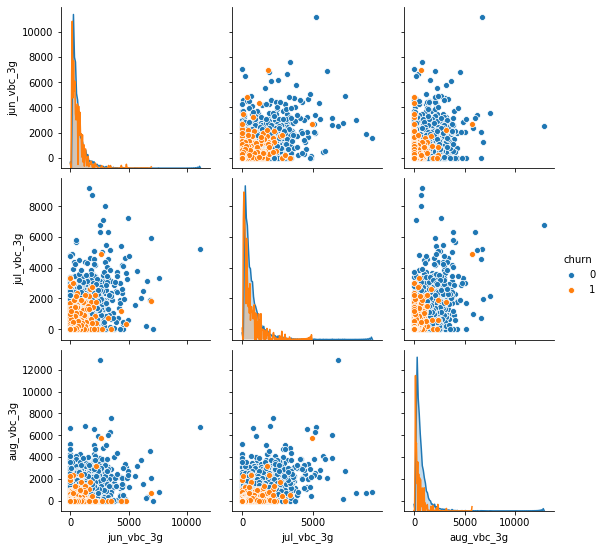

In [51]:
plot_variables(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g', 'churn'])

## PCA and Model Building

In [52]:
high_value_customer.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

In [53]:
high_value_customer_numeric = high_value_customer.select_dtypes(include=['float64','int64'])
high_value_customer_numeric  = high_value_customer_numeric.set_index('mobile_number')
high_value_customer_numeric.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7000701601           109             0.0             0.0             0.0   
7001524846           109             0.0             0.0             0.0   
7002124215           109             0.0             0.0             0.0   
7000887461           109             0.0             0.0             0.0   

                 arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7000842753              0.00           0.00              0.00   
7000701601             12.59          38.06             51.39   
7001524846              0.00           0.00            297.13   
7002124215              0.00           0.00              4.48   
7000887461              0.00           0.00             48.96   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601                31.38             40.28            308.63   
7001524846               217.59             12.49             80.96   
7002124215                 6.16             23.34             91.81   
7000887461                50.66             33.58             82.94   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601               447.38            162.28             62.13   
7001524846                70.58             50.54              0.00   
7002124215                87.93            104.81              0.75   
7000887461                83.01            148.56              0.00   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00               0.0   
7000701601                55.14             53.23               0.0   
7001524846                 0.00              0.00               0.0   
7002124215                 0.00              1.58               0.0   
7000887461                 0.00              0.

## Model Building
Let's start by splitting our data into a training set and a test set.

In [54]:
from sklearn.model_selection import train_test_split
# Putting response variable to y
y = high_value_customer_numeric['churn']
# Putting feature variable to X
X = high_value_customer_numeric.drop(['churn'],axis=1)
y.head()

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int64

In [55]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
0        0.0             0.0             0.0             0.0 -0.784261   
1        0.0             0.0             0.0             0.0  1.107406   
2        0.0             0.0             0.0             0.0 -0.390789   
3        0.0             0.0             0.0             0.0 -0.096270   
4        0.0             0.0             0.0             0.0 -1.051229   

     arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0 -0.721520 -0.587674    -0.567366    -0.558098    -0.510841     -0.774388   
1  1.643033  5.302613    -0.441585    -0.444251    -0.396856      0.164965   
2 -0.143614 -0.739908     0.332262     0.172765    -0.434372     -0.578284   
3  0.076231  0.256647    -0.344661    -0.283038    -0.325248      0.795786   
4 -0.765100 -0.282646    -0.460896    -0.452621    -0.437642     -0.597447   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     -0.757784     -0.695309      -0.211205      -0.166765      -0.168679   
1      0.378512     -0.019115       0.001388       0.274868       0.257863   
2     -0.596243     -0.412142      -0.211205      -0.166765      -0.168679   
3      1.038700      1.345016      -0.211205      -0.166765      -0.168679   
4     -0.578752     -0.268131      -0.211205      -0.166765      -0.168679   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0      -0.228739      -0.209660      -0.189787         -0.369385   
1      -0.024563      -0.078695       0.173388         -0.144935   
2      -0.228739      -0.209660      -0.189787          0.928357   
3      -0.228739      -0.209660      -0.189787         -0.349818   
4      -0.228739      -0.209660      -0.189787         -0.155548   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         -0.356309         -0.343476         -0.652678         -0.674810   
1         -0.225938         -0.166450          0.580783          1.176321   
2          0.547687         -0.288584         -0.329115         -0.382770   
3         -0.330717         -0.240899         -0.285753         -0.310981   
4         -0.145838         -0.195895         -0.321202         -0.331338   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0         -0.649478         -0.286747         -0.292688         -0.301900   
1          0.044793          2.519590          2.218605          2.425615   
2         -0.433257         -0.286747         -0.292688         -0.301900   
3         -0.201077         -0.252871         -0.292688         -0.220941   
4         -0.013904         -0.286747         -0.292688         -0.301900   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0         -0.250059         -0.206567         -0.238110     -0.671633   
1         -0.250059         -0.206567         -0.238110      0.443598   
2         -0.250059         -0.206567          0.762241      0.327177   
3         -0.250059         -0.206567         -0.238110     -0.415280   
4         -0.250059         -0.206567          2.239684     -0.323163   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0     -0.679653     -0.648791         -0.410655         -0.413745   
1      0.741790      0.054813         -0.400011         -0.358485   
2      0.087577     -0.475387         -0.122128         -0.097157   
3     -0.429155     -0.291914         -0.168244         -0.114929   
4     -0.323753     -0.147777         -0.410655         -0.413745   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0         -0.373493         -0.438580         -0.433291         -0.384626   
1         -0.343304         -0.316641         -0.360077         -0.264487   
2         -0.316735         -0.405120         -0.410147         -0.199578   
3         -0.218176          1.187674          1.431021          1.759453   
4         -0.373493         -0.432812         

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [57]:
X_train.shape

(20967, 173)

In [58]:
from sklearn.decomposition import PCA

In [59]:
y_train.shape

(20967,)

In [60]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

## Components from the PCA

In [61]:
pca.components_

array([[-4.26445796e-19, -1.11022302e-16,  1.11022302e-16, ...,
         1.48414781e-01,  1.50921102e-01,  1.36504777e-01],
       [ 5.97920456e-20,  5.89805982e-17, -2.77555756e-17, ...,
        -1.30799242e-02, -1.30767709e-02,  1.10648187e-02],
       [ 2.40489606e-19,  1.38777878e-17,  0.00000000e+00, ...,
        -2.41488018e-02, -1.97351547e-02, -7.57482478e-03],
       ...,
       [ 9.99993608e-01, -5.96117765e-04,  3.15316996e-03, ...,
         2.11419424e-18,  2.38524478e-18,  6.50521303e-19],
       [ 0.00000000e+00,  4.98876915e-01,  3.03204485e-01, ...,
        -4.85722573e-17, -6.93889390e-18,  5.55111512e-17],
       [-0.00000000e+00, -5.46903199e-01,  1.19327753e-01, ...,
         4.16333634e-17, -0.00000000e+00, -0.00000000e+00]])

In [62]:
pca.explained_variance_ratio_

array([1.18104217e-01, 8.92707680e-02, 6.30829669e-02, 5.36491478e-02,
       3.63147052e-02, 3.31331423e-02, 2.79672645e-02, 2.61643557e-02,
       2.31696327e-02, 2.19414259e-02, 2.13448632e-02, 1.99329878e-02,
       1.92460144e-02, 1.79138201e-02, 1.70471929e-02, 1.66938371e-02,
       1.47611595e-02, 1.43453404e-02, 1.40617898e-02, 1.33968069e-02,
       1.26940808e-02, 1.09939078e-02, 1.07922298e-02, 1.03216974e-02,
       1.01290588e-02, 1.00129462e-02, 9.12297719e-03, 8.64160190e-03,
       8.14705654e-03, 8.00662117e-03, 7.38443610e-03, 7.21004736e-03,
       7.12666343e-03, 6.86502470e-03, 6.68147612e-03, 6.36873555e-03,
       6.23995865e-03, 6.02182817e-03, 5.96013346e-03, 5.88780112e-03,
       5.53453427e-03, 5.34839086e-03, 5.18498620e-03, 5.00697249e-03,
       4.96496205e-03, 4.76999829e-03, 4.76505192e-03, 4.62361466e-03,
       4.53500579e-03, 4.33002894e-03, 4.17766727e-03, 4.09837832e-03,
       4.05451261e-03, 4.02338551e-03, 3.90168073e-03, 3.52862255e-03,
      

### Scree plot

In [63]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu*100)

[ 11.81042171  20.73749851  27.0457952   32.41070998  36.0421805
  39.35549473  42.15222117  44.76865675  47.08562002  49.2797626
  51.41424893  53.40754771  55.33214915  57.12353116  58.82825045
  60.49763416  61.97375011  63.40828415  64.81446313  66.15414381
  67.4235519   68.52294267  69.60216566  70.6343354   71.64724128
  72.6485359   73.56083362  74.42499381  75.23969947  76.04036158
  76.77880519  77.49980993  78.21247627  78.89897874  79.56712635
  80.20399991  80.82799577  81.43017859  82.02619194  82.61497205
  83.16842547  83.70326456  84.22176318  84.72246043  85.21895663
  85.69595646  86.17246166  86.63482312  87.0883237   87.52132659
  87.93909332  88.34893115  88.75438241  89.15672097  89.54688904
  89.89975129  90.2447364   90.57429844  90.89757013  91.20502063
  91.49793157  91.78687492  92.06663649  92.33971865  92.61013296
  92.86534217  93.10939935  93.34744507  93.58287693  93.81168491
  94.03608531  94.24472516  94.44961736  94.65350374  94.85652096
  95.0450600

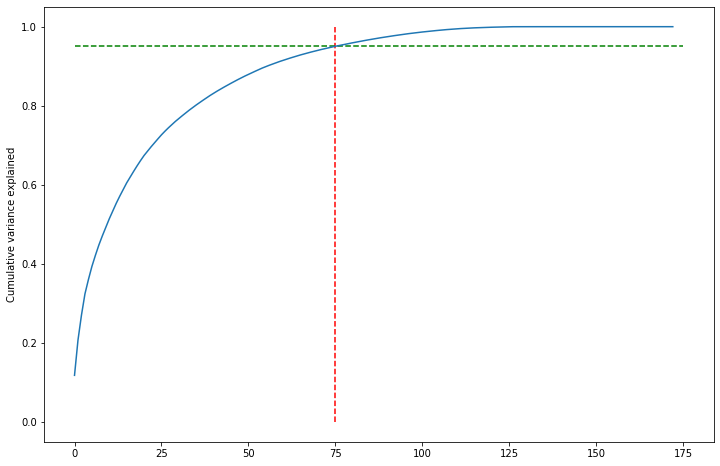

In [64]:

fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=175, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## PCA with 75 components

In [65]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20967, 75)

In [66]:
#applying transformation on Test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 75)

## Treating data for Class Imbalance

In [67]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from collections import Counter
from matplotlib import pyplot
from numpy import where
#weighting = compute_class_weight('balanced', [0,1], y_train)
counter = Counter(y_train)
print(counter)


Counter({0: 19215, 1: 1752})


In [68]:
##From the above analysis it is evident that the data has 10:1 distribution

## Applying logistic regression on the data on our Principal components

In [69]:
# Rearranging the weights by defining grid
model =  LogisticRegression(solver='lbfgs')
# Define weights basis the class
balance = [{0:1,1:5}, {0:1,1:10},{0:1,1:15},{0:1,1:20}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(df_train_pca, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.895067 using {'class_weight': {0: 1, 1: 5}}


In [70]:
#print("All: %f using %s" % (grid_result.score_, grid_result.params_))

### From Grid Search We understood that class weights 1:5 will help balancing the data in better way

In [71]:
from sklearn.linear_model import LogisticRegression 
weights = {0:1, 1:5}
lm = LogisticRegression(solver='lbfgs', class_weight=weights)
lm.fit(df_train_pca ,y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making Predictions

In [72]:
# Predicted probabilities
y_pred = lm.predict_proba(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
#y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
print(y_pred_1)
# Let's see the head
y_pred_1.head()

                 1
0     2.699741e-03
1     3.820849e-03
2     6.592341e-03
3     4.923261e-02
4     2.708921e-01
5     4.117227e-03
6     3.555740e-03
7     6.880261e-04
8     3.057832e-05
9     2.156944e-02
10    1.214284e-01
11    4.224650e-02
12    6.863208e-01
13    7.813453e-02
14    1.655562e-03
15    6.714037e-03
16    8.526589e-01
17    2.101530e-01
18    4.769861e-03
19    1.845303e-02
20    1.954522e-02
21    4.553917e-01
22    3.770525e-03
23    1.045478e-02
24    6.099847e-01
25    4.036025e-02
26    6.747254e-01
27    1.512196e-01
28    4.311081e-01
29    1.281138e-01
30    3.683476e-01
31    7.892638e-02
32    1.898795e-01
33    4.546488e-01
34    5.312434e-02
35    5.165770e-04
36    2.026272e-02
37    6.648864e-02
38    1.298817e-02
39    2.193637e-02
40    2.974490e-03
41    4.010792e-06
42    4.862708e-02
43    2.578088e-01
44    6.395901e-02
45    8.107000e-01
46    2.123214e-01
47    2.973863e-01
48    3.044751e-02
49    1.943454e-02
50    6.223867e-02
51    7.4848

1
0  0.002700
1  0.003821
2  0.006592
3  0.049233
4  0.270892

In [73]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
mobile_number       
7000109958         0
7001501307         0
7000870553         0
7002362705         0
7002044200         0

In [74]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
#print(y_test_df)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_pred_1,y_test_df,],axis=1)
#print(y_pred_final)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
#print(y_pred_final)

# Let's see the head of y_pred_final
y_pred_final.head()

Churn_Prob  churn  mobile_number
0    0.002700      0     7000109958
1    0.003821      0     7001501307
2    0.006592      0     7000870553
3    0.049233      0     7002362705
4    0.270892      0     7002044200

In [75]:
#Rearranging the columns
y_pred_final = y_pred_final.reindex(['mobile_number','churn','Churn_Prob'], axis=1)

In [76]:
y_pred_final.head()

mobile_number  churn  Churn_Prob
0     7000109958      0    0.002700
1     7001501307      0    0.003821
2     7000870553      0    0.006592
3     7002362705      0    0.049233
4     7002044200      0    0.270892

In [77]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

mobile_number  churn  Churn_Prob  predicted
0     7000109958      0    0.002700          0
1     7001501307      0    0.003821          0
2     7000870553      0    0.006592          0
3     7002362705      0    0.049233          0
4     7002044200      0    0.270892          0

## Model Evaluation

In [78]:
#Let us write a generic function for plotting the confusion matrix
def plot_confusion_matrix(confusion_matrix):
    plt.clf()
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Non Churn','Churn']
    plt.title('CONFUSION MATRIX')
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]),fontsize=12)
    plt.show()

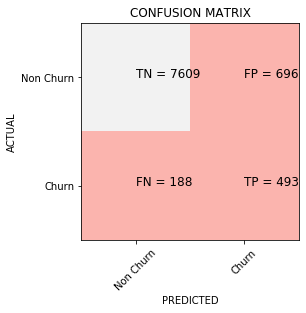

In [79]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted)

#Using the function to plot the confusion matrix
plot_confusion_matrix(confusion)

In [80]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9016247496105052

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

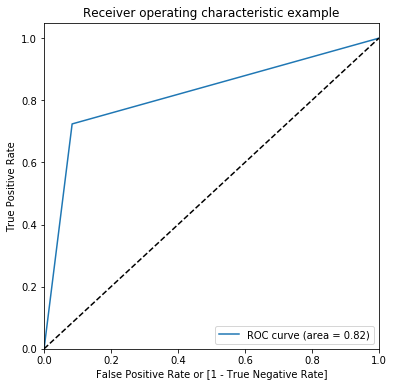

(array([0.        , 0.08380494, 1.        ]),
 array([0.        , 0.72393539, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [82]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

### As we understand understanding Churn is more important ,Sensitivity is most important parameter to monitor and increase

##### Mapping other important Metrics

In [83]:
#Now we will look into couple of metrics
#True positive
TP = confusion[1,1] 

#True negatives
TN = confusion[0,0] 

#False positives
FP = confusion[0,1] 

#False negatives
FN = confusion[1,0] 

print(TN / float(TN+FP))
print(FP/ float(TN+FP))

0.9161950632149307
0.08380493678506924


In [84]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")

sensitivity : 72.0 %
specificity : 92.0 %
false positive rate : 8.0 %


#### Finding Optimal Cutoff Point

In [85]:
#Now earlier we had assumed the cutoff probability as 0.5
#Let's now look at different levels of cutoff and the respective probability

num_range = [float(x)/10 for x in range(10)]
for i in num_range:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

mobile_number  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0     7000109958      0    0.002700          0    1    0    0    0    0    0   
1     7001501307      0    0.003821          0    1    0    0    0    0    0   
2     7000870553      0    0.006592          0    1    0    0    0    0    0   
3     7002362705      0    0.049233          0    1    0    0    0    0    0   
4     7002044200      0    0.270892          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [86]:
#Let us know understand different parameters associated 
cutoff = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

In [87]:
cutoff_list_of_numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for numbers in cutoff_list_of_numbers:
    confusion_matix = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[numbers] )
    sum_of_confusion_matrix=sum(sum(confusion_matix))
    accuracy = (confusion_matix[0,0]+confusion_matix[1,1])/sum_of_confusion_matrix
    
    specificity = confusion_matix[0,0]/(confusion_matix[0,0]+confusion_matix[0,1])
    sensitivity = confusion_matix[1,1]/(confusion_matix[1,0]+confusion_matix[1,1])
    cutoff.loc[numbers] =[ numbers ,accuracy, sensitivity, specificity]
print(cutoff)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.075785     1.000000     0.000000
0.1          0.1  0.561763     0.945668     0.530283
0.2          0.2  0.713554     0.907489     0.697652
0.3          0.3  0.801692     0.856094     0.797231
0.4          0.4  0.864233     0.798825     0.869597
0.5          0.5  0.901625     0.723935     0.916195
0.6          0.6  0.918985     0.656388     0.940518
0.7          0.7  0.932339     0.547724     0.963877
0.8          0.8  0.934120     0.334802     0.983263
0.9          0.9  0.930336     0.139501     0.995184


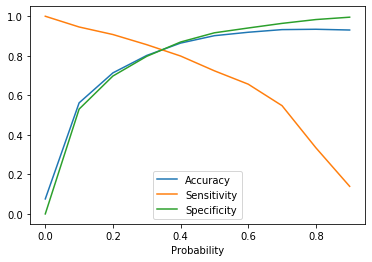

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From above curve 0.3 seems to be ideal probability where there seems to good balance for Sensitivity and specificity

In [89]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.3 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final=y_pred_final[['mobile_number','churn','Churn_Prob','predicted']]
y_pred_final.head()

mobile_number  churn  Churn_Prob  predicted
0     7000109958      0    0.002700          0
1     7001501307      0    0.003821          0
2     7000870553      0    0.006592          0
3     7002362705      0    0.049233          0
4     7002044200      0    0.270892          0

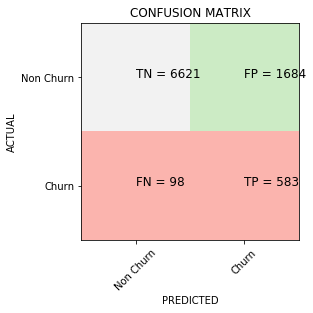

In [90]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted)

#Using the function to plot the confusion matrix
plot_confusion_matrix(confusion)

In [91]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8016915201424438

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

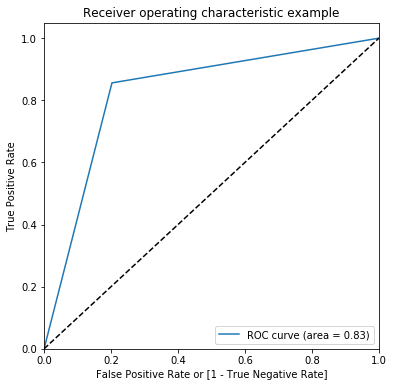

(array([0.        , 0.20276942, 1.        ]),
 array([0.        , 0.85609398, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [93]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [94]:
#Now we will look into couple of metrics
#True positive
TP = confusion[1,1] 

#True negatives
TN = confusion[0,0] 

#False positives
FP = confusion[0,1] 

#False negatives
FN = confusion[1,0]

In [95]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")

sensitivity : 86.0 %
specificity : 80.0 %
false positive rate : 20.0 %


# Applying Random Forest Model on PCA

#### Default Hyperparameters

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [97]:
#fit
#df_train_pca, df_test_pca, y_train, y_test
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
#predict
predictions = rfc.predict(df_test_pca)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8305
           1       0.71      0.19      0.29       681

    accuracy                           0.93      8986
   macro avg       0.82      0.59      0.63      8986
weighted avg       0.92      0.93      0.91      8986



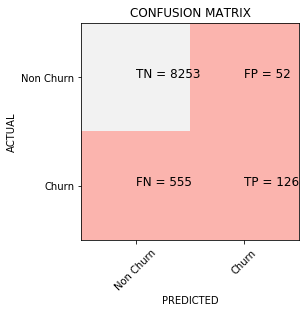

In [101]:
# Printing confusion matrix
confusion = confusion_matrix(y_test,predictions)

#Using the function to plot the confusion matrix
plot_confusion_matrix(confusion)

In [102]:
print(accuracy_score(y_test,predictions))

0.9324504785221456


In [103]:
#Now we will look into couple of metrics
#True positive
TP = confusion[1,1] 

#True negatives
TN = confusion[0,0] 

#False positives
FP = confusion[0,1] 

#False negatives
FN = confusion[1,0] 

In [104]:
# Let's see the sensitivity of our Random forest model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")

sensitivity : 19.0 %
specificity : 99.0 %
false positive rate : 1.0 %


In [105]:
# The default classifier has very low sensitivity - Using smote for treating class imbalance

In [106]:
weights = {0:1, 1:10}
# class_weight=class_weight, 
rfc2 = RandomForestClassifier(class_weight=weights)

In [107]:
#fit
rfc2.fit(df_train_pca,y_train)
#predict
predictions2 = rfc2.predict(df_test_pca)

[[8248   57]
 [ 584   97]]


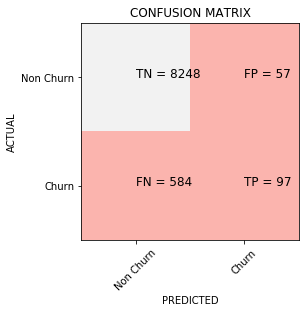

In [108]:
# Printing confusion matrix
confusion= confusion_matrix(y_test,predictions2)
print(confusion)

#Using the function to plot the confusion matrix
plot_confusion_matrix(confusion)

In [109]:
#Now we will look into couple of metrics
#True positive
TP = confusion[1,1] 

#True negatives
TN = confusion[0,0] 

#False positives
FP = confusion[0,1] 

#False negatives
FN = confusion[1,0] 

# Let's see the sensitivity of our Random forest model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")

sensitivity : 14.0 %
specificity : 99.0 %
false positive rate : 1.0 %


### Tuning max_depth

In [110]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}

# instantiate the model
weights = {0:1, 1:10}
rf = RandomForestClassifier(class_weight=weights)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                          

In [111]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.043624      0.360461         0.095172        0.008657   
1      13.261635      0.270783         0.088189        0.006420   
2      17.402709      0.219180         0.110898        0.004459   
3      18.258993      0.393020         0.126101        0.009144   
4      19.198619      0.324211         0.139392        0.008745   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.859084           0.862899   
1               7   {'max_depth': 7}           0.884597           0.889127   
2              12  {'max_depth': 12}           0.910587           0.926562   
3              17  {'max_depth': 17}           0.918693           0.929900   
4              22  {'max_depth': 22}           0.920601           0.925608   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.861913           0.866206           0.857143         0.861449   
1           0.896733           0.883616           0.884331         0.887681   
2           0.922251           0.917005           0.910327         0.917346   
3           0.925829           0.918197           0.918197         0.922163   
4           0.923444           0.921536           0.919628         0.922163   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003133                8            0.870387            0.857628   
1        0.004925                7            0.910332            0.907768   
2        0.006389                6            0.971263            0.971323   
3        0.004833                2            0.992011            0.990163   
4        0.002134                1            0.997556            0.997675   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.852033            0.869620            0.864910   
1            0.905866            0.907953            0.909443   
2            0.970550            0.970848            0.972100   
3            0.991535            0.990581            0.990402   
4            0.997973            0.997079            0.997437   

   mean_train_score  std_train_score  
0          0.862916         0.007087  
1          0.908273         0.001534  
2          0.971217         0.000524  
3          0.990938         0.000710  
4          0.997544         0.000293

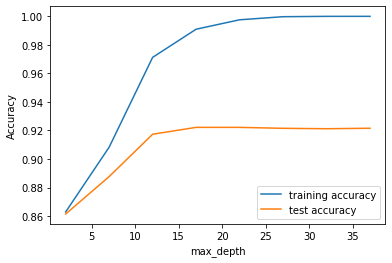

In [112]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to remain stable. The ensemble tries to overfit as we increase the max_depth.


### Tree depth of 18 seems good in this case

### Tuning n_estimators

In [113]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5
weights = {0:1, 1:10}
# parameters to build the model on
parameters = {'n_estimators': range(5, 40, 5)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=18,class_weight=weights)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                            

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.011921      0.051752         0.013395        0.003079   
1       1.970250      0.105679         0.017405        0.001733   
2       2.789592      0.061945         0.026196        0.006031   
3       3.743530      0.012800         0.027768        0.002056   
4       4.727293      0.194452         0.033778        0.002505   

  param_n_estimators                params  split0_test_score  \
0                  5   {'n_estimators': 5}           0.913209   
1                 10  {'n_estimators': 10}           0.916786   
2                 15  {'n_estimators': 15}           0.919886   
3                 20  {'n_estimators': 20}           0.921316   
4                 25  {'n_estimators': 25}           0.919170   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.913209           0.920343           0.911519           0.909134   
1           0.923701           0.918912           0.918435           0.917243   
2           0.927277           0.923205           0.915335           0.914620   
3           0.926800           0.924159           0.917482           0.917005   
4           0.928231           0.925590           0.918435           0.915097   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.913483        0.003741                7            0.980385   
1         0.919015        0.002466                6            0.983008   
2         0.920065        0.004774                5            0.988970   
3         0.921352        0.003780                2            0.988255   
4         0.921305        0.004851                3            0.991892   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.974841            0.971384            0.973829   
1            0.983008            0.980565            0.980148   
2            0.989030            0.989448            0.987183   
3            0.986884            0.989031            0.989269   
4            0.990342            0.991475            0.989984   

   split4_train_score  mean_train_score  std_train_score  
0            0.975736          0.975235         0.002958  
1            0.982950          0.981936         0.001297  
2            0.985931          0.988112         0.001341  
3            0.990104          0.988708         0.001086  
4            0.991117          0.990962         0.000706

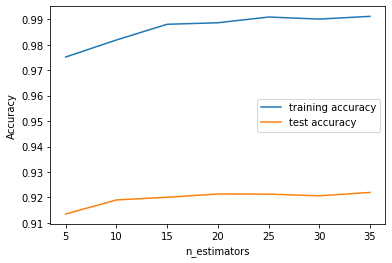

In [115]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### From Above it is very evident that around 25 estimators provide reasonable test accuracy

## Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [116]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,50]}
weights = {0:1, 1:10}

# instantiate the model
rf = RandomForestClassifier(max_depth=18,class_weight=weights)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                            

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.359362      0.183111         0.139583        0.010557   
1      19.104862      0.463533         0.123814        0.006662   
2      31.707257      0.492359         0.121906        0.010261   
3      44.806854      0.239260         0.126489        0.005668   
4      49.823954      2.246099         0.099949        0.010730   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.919409   
1                  8   {'max_features': 8}           0.920362   
2                 14  {'max_features': 14}           0.921078   
3                 20  {'max_features': 20}           0.918932   
4                 24  {'max_features': 24}           0.922270   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.926800           0.925352           0.920820           0.918197   
1           0.929423           0.926544           0.921059           0.917243   
2           0.927754           0.925829           0.919389           0.916528   
3           0.929423           0.926067           0.918674           0.915574   
4           0.927754           0.924636           0.918912           0.917005   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.922116        0.003370                2            0.995111   
1         0.922926        0.004419                1            0.993323   
2         0.922115        0.004131                3            0.991355   
3         0.921734        0.005159                5            0.990759   
4         0.922115        0.003861                4            0.989745   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.995350            0.994694            0.994277   
1            0.992667            0.992965            0.992727   
2            0.990044            0.990819            0.991356   
3            0.989745            0.989090            0.989150   
4            0.987480            0.988971            0.988733   

   split4_train_score  mean_train_score  std_train_score  
0            0.994933          0.994873         0.000367  
1            0.991654          0.992667         0.000557  
2            0.989508          0.990616         0.000734  
3            0.988375          0.989424         0.000797  
4            0.987063          0.988398         0.000988

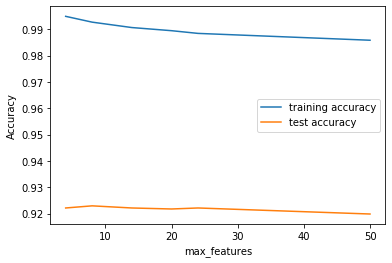

In [118]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### From Above it is very evident that we can consider around 20 Max features

### Tuning min_samples_leaf

In [119]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
weights = {0:1, 1:10}
parameters = {'min_samples_leaf': range(100, 800, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=18,class_weight=weights)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                            

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.276878      0.259986         0.132614        0.013539   
1      13.059788      0.206803         0.138224        0.008627   
2      12.681523      0.352740         0.120801        0.019128   
3      11.909761      0.208434         0.136102        0.018694   
4      11.328807      0.247625         0.141190        0.021035   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.869099   
1                    150  {'min_samples_leaf': 150}           0.862899   
2                    200  {'min_samples_leaf': 200}           0.855508   
3                    250  {'min_samples_leaf': 250}           0.856223   
4                    300  {'min_samples_leaf': 300}           0.849309   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.873867           0.884570           0.875268           0.871214   
1           0.867907           0.873599           0.864298           0.865729   
2           0.862184           0.866444           0.857381           0.863105   
3           0.853124           0.865013           0.859528           0.858335   
4           0.853839           0.859766           0.853088           0.854758   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.874804        0.005327                1            0.890121   
1         0.866886        0.003743                2            0.878853   
2         0.860925        0.003967                3            0.869671   
3         0.858445        0.003939                4            0.867108   
4         0.854152        0.003364                5            0.862279   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.885769            0.886312            0.889710   
1            0.876587            0.873435            0.877012   
2            0.867167            0.864493            0.869798   
3            0.860788            0.860200            0.868904   
4            0.859357            0.854000            0.866043   

   split4_train_score  mean_train_score  std_train_score  
0            0.891439          0.888670         0.002229  
1            0.881424          0.877462         0.002639  
2            0.872243          0.868675         0.002636  
3            0.868368          0.865074         0.003789  
4            0.861750          0.860686         0.003971

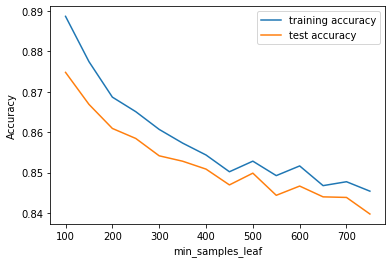

In [121]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [122]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 500, 50)}
weights = {0:1, 1:10}

# instantiate the model
rf = RandomForestClassifier(max_depth=18,class_weight=weights)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True, n_jobs=-1)
rf.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                            

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      19.399970      0.734839         0.131017        0.014930   
1      18.581311      0.741970         0.128703        0.011501   
2      18.157112      0.565561         0.125630        0.010826   
3      17.198663      0.295257         0.132408        0.023484   
4      16.909176      0.496073         0.127252        0.012417   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.908441   
1                     100  {'min_samples_split': 100}           0.898426   
2                     150  {'min_samples_split': 150}           0.893896   
3                     200  {'min_samples_split': 200}           0.881497   
4                     250  {'min_samples_split': 250}           0.877682   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.922270           0.922251           0.912235           0.908657   
1           0.909633           0.910804           0.904603           0.898402   
2           0.902957           0.905318           0.891486           0.891724   
3           0.891273           0.901264           0.885285           0.881946   
4           0.888412           0.890293           0.880515           0.877653   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.914771        0.006262                1            0.961665   
1         0.904374        0.005293                2            0.936565   
2         0.897076        0.005874                3            0.919454   
3         0.888253        0.007384                4            0.909259   
4         0.882911        0.005394                5            0.902462   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.958564            0.959163            0.960773   
1            0.932511            0.932872            0.935376   
2            0.917546            0.916895            0.920055   
3            0.906278            0.907416            0.909920   
4            0.899839            0.896387            0.902707   

   split4_train_score  mean_train_score  std_train_score  
0            0.960355          0.960104         0.001114  
1            0.935972          0.934659         0.001654  
2            0.922499          0.919290         0.001984  
3            0.909860          0.908547         0.001452  
4            0.900382          0.900355         0.002279

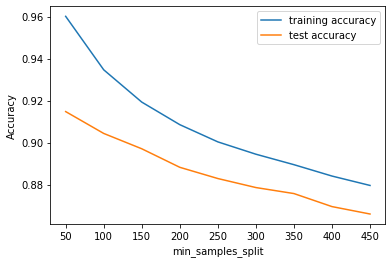

In [124]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Final Grid Search to Find Optimal Hyperparameters

In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [18,20,22,25],
    'min_samples_leaf': [200,300,400],
    'min_samples_split': range(200,300,50),
    'n_estimators': [15,20,25]
        }
# Create a based model
weights = {0:1, 1:10}
rf = RandomForestClassifier(class_weight=weights)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3,scoring="accuracy",return_train_score=True, n_jobs=-1)
grid_search.fit(df_train_pca,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 10},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                          

In [126]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8589688558210522 using {'max_depth': 18, 'min_samples_leaf': 200, 'min_samples_split': 200, 'n_estimators': 25}


#### **Fitting the final model with the best parameters obtained from grid search.**

In [127]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
weights = {0:1, 1:10}
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=200, 
                             min_samples_split=250,
                             max_features=20,
                             n_estimators=20,class_weight=weights, n_jobs=-1)

In [128]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=200,
                       min_samples_split=250, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [129]:
# predict
predictions = rfc.predict(df_test_pca)
#lm.fit(df_train_pca ,y_train)
print(predictions)

[0 0 1 ... 0 0 0]


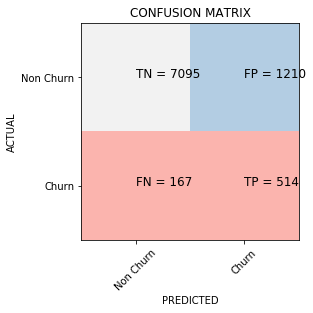

In [130]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
confusion = confusion_matrix(y_test,predictions)

#Using the function to plot the confusion matrix
plot_confusion_matrix(confusion)

In [131]:
# metrics: AUC
#metrics.roc_auc_score(y_test, predictions[:,1])

In [132]:
TP = confusion[1,1] 

#True negatives
TN = confusion[0,0] 

#False positives
FP = confusion[0,1] 

#False negatives
FN = confusion[1,0] 

# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")


sensitivity : 75.0 %
specificity : 85.0 %
false positive rate : 15.0 %


### We could reduce the error in predicting churns therefore this model will be fit for further use

### 5.Using Boosting to boost the performance of model : Base model is Random forest

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
weights = {0:1, 1:10}
rf = RandomForestClassifier(class_weight=weights)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=rf,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [134]:
# fit
adaboost_model_1.fit(df_train_pca,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight={0: 1,
                                                                       1: 10},
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                       

In [135]:
predictions = adaboost_model_1.predict_proba(df_test_pca)
predictions[:10]

array([[0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142]])

In [136]:
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.5919242605475356

## AdaBoost - Hyperparameter Tuning

In [137]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [100,200, 500]
             }
weights = {0:1, 1:10}
rf = RandomForestClassifier(class_weight=weights)
ABC = AdaBoostClassifier(
    base_estimator=rf,
    learning_rate=0.6,
    algorithm="SAMME")

In [138]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1, n_jobs=-1)

In [139]:
# fit 
grid_search_ABC.fit(df_train_pca,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:   53.1s remaining:   15.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                class_weight={0: 1,
                                                                                              1: 10},
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                

In [140]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.169467      0.364913         0.185318        0.001273   
1       9.273812      0.316524         0.201683        0.007717   
2       9.467559      0.446034         0.199303        0.038878   
3      46.724990      0.142220         0.644196        0.032375   
4      39.576075      7.064503         0.362884        0.039499   
5      49.722511     10.185269         0.458085        0.057639   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                100   
1                               2                200   
2                               2                500   
3                               5                100   
4                               5                200   
5                               5                500   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...           0.749832   
1  {'base_estimator__max_depth': 2, 'n_estimators...           0.751927   
2  {'base_estimator__max_depth': 2, 'n_estimators...           0.760738   
3  {'base_estimator__max_depth': 5, 'n_estimators...           0.847797   
4  {'base_estimator__max_depth': 5, 'n_estimators...           0.842646   
5  {'base_estimator__max_depth': 5, 'n_estimators...           0.845550   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.768663           0.758600         0.759032        0.007694   
1           0.773881           0.757538         0.761115        0.009312   
2           0.773261           0.755589         0.763196        0.007421   
3           0.858158           0.838762         0.848239        0.007925   
4           0.866216           0.840737         0.849866        0.011587   
5           0.868602           0.842967         0.852373        0.011524   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.779031            0.776396   
1                5            0.781474            0.778429   
2                4            0.780987            0.774110   
3                3            0.983195            0.981372   
4                2            0.943199            0.982803   
5                1            0.977687            0.994895   

   split2_train_score  mean_train_score  std_train_score  
0            0.783785          0.779738         0.003058  
1            0.786455          0.782119         0.003308  
2            0.785639          0.780245         0.004736  
3            0.983641          0.982736         0.000982  
4            0.984012          0.970005         0.018961  
5            0.982957          0.985180         0.007199

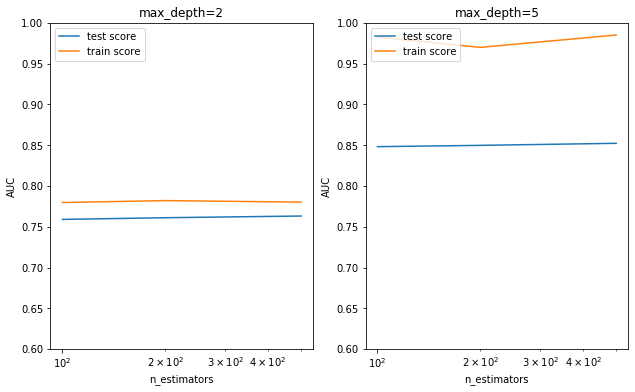

In [141]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

#### We can understand that there is clear overfit for max depth at 5. Therefore trying max depth at 2 seems better if we conisder both test and train accuracy
-We can explore the combination of max depth at 2,3 and estimators 400 to 700

In [142]:
# parameter grid
param_grid = { 
              "base_estimator__max_depth" : [2, 3],
              "n_estimators": [400,600],
                         }
weights = {0:1, 1:10}
rf = RandomForestClassifier(class_weight=weights)
ABC = AdaBoostClassifier(
    base_estimator=rf,
    learning_rate=0.6,
    algorithm="SAMME")

In [143]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1, n_jobs = -1)

In [144]:
# fit 
grid_search_ABC.fit(df_train_pca,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    9.6s remaining:   48.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   31.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                class_weight={0: 1,
                                                                                              1: 10},
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                

In [145]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.050659      0.081490         0.236881        0.005692   
1       8.972355      0.279110         0.239404        0.016973   
2      29.402573      1.247967         0.326749        0.038529   
3      24.058376      3.071638         0.359328        0.038426   

  param_base_estimator__max_depth param_n_estimators  \
0                               2                400   
1                               2                600   
2                               3                400   
3                               3                600   

                                              params  split0_test_score  \
0  {'base_estimator__max_depth': 2, 'n_estimators...           0.766243   
1  {'base_estimator__max_depth': 2, 'n_estimators...           0.753151   
2  {'base_estimator__max_depth': 3, 'n_estimators...           0.853311   
3  {'base_estimator__max_depth': 3, 'n_estimators...           0.856701   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.774336           0.756830         0.765803        0.007154   
1           0.777527           0.762655         0.764444        0.010031   
2           0.863854           0.871673         0.862946        0.007524   
3           0.861370           0.873797         0.863956        0.007215   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.782213            0.778030   
1                4            0.776937            0.781456   
2                2            0.938342            0.941704   
3                1            0.902052            0.912875   

   split2_train_score  mean_train_score  std_train_score  
0            0.782987          0.781077         0.002177  
1            0.781418          0.779937         0.002121  
2            0.937489          0.939178         0.001820  
3            0.937852          0.917593         0.014991

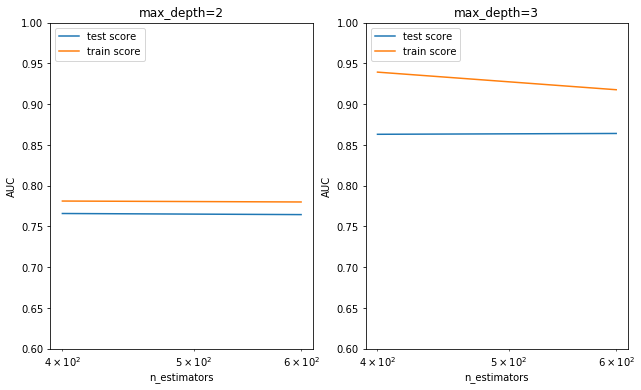

In [146]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

#### Basis the above experience we can finalise the number of estimators at 400 and max depth at 2

In [147]:
# model performance on test data with chosen hyperparameters

# base estimator
weights = {0:1, 1:10}
rf = RandomForestClassifier(class_weight=weights)

# adaboost with the tree as base estimator
ABC = AdaBoostClassifier(
    base_estimator=rf,
    learning_rate=0.6,
    n_estimators=400,
    algorithm="SAMME")
ABC.fit(df_train_pca,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight={0: 1,
                                                                       1: 10},
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                       

In [148]:
# predict on test data
predictions = ABC.predict_proba(df_test_pca)
predictions[:10]

array([[0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142]])

In [149]:
y_pred_df_ADA = pd.DataFrame(predictions)
#y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
# Converting to column dataframe
y_pred_1_AB = y_pred_df.iloc[:,[1]]
#print(y_pred_1)
# Let's see the head
y_pred_1_AB.head()


1
0  0.002700
1  0.003821
2  0.006592
3  0.049233
4  0.270892

In [150]:
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1_AB.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_pred_1,y_test_df,],axis=1)
#print(y_pred_final)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
#print(y_pred_final)

# Let's see the head of y_pred_final
y_pred_final.head()
#Rearranging the columns
y_pred_final2 = y_pred_final.reindex(['mobile_number','churn','Churn_Prob'], axis=1)
y_pred_final2.head()

mobile_number  churn  Churn_Prob
0              0      0    0.002700
1              1      0    0.003821
2              2      0    0.006592
3              3      0    0.049233
4              4      0    0.270892

In [151]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final2['predicted'] = y_pred_final2.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final2.head()

mobile_number  churn  Churn_Prob  predicted
0              0      0    0.002700          0
1              1      0    0.003821          0
2              2      0    0.006592          0
3              3      0    0.049233          0
4              4      0    0.270892          0

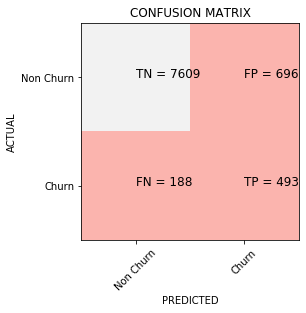

In [152]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final2.churn, y_pred_final2.predicted)

#Using the function to plot the confusion matrix
plot_confusion_matrix(confusion)

In [153]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final2.churn, y_pred_final2.predicted)


0.9016247496105052

In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")


sensitivity : 72.0 %
specificity : 92.0 %
false positive rate : 8.0 %


In [155]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final2[i]= y_pred_final2.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final2.head()


mobile_number  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0              0      0    0.002700          0    1    0    0    0    0    0   
1              1      0    0.003821          0    1    0    0    0    0    0   
2              2      0    0.006592          0    1    0    0    0    0    0   
3              3      0    0.049233          0    1    0    0    0    0    0   
4              4      0    0.270892          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final2.churn, y_pred_final2[i]  )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.075785  1.000000  0.000000
0.1   0.1  0.561763  0.945668  0.530283
0.2   0.2  0.713554  0.907489  0.697652
0.3   0.3  0.801692  0.856094  0.797231
0.4   0.4  0.864233  0.798825  0.869597
0.5   0.5  0.901625  0.723935  0.916195
0.6   0.6  0.918985  0.656388  0.940518
0.7   0.7  0.932339  0.547724  0.963877
0.8   0.8  0.934120  0.334802  0.983263
0.9   0.9  0.930336  0.139501  0.995184


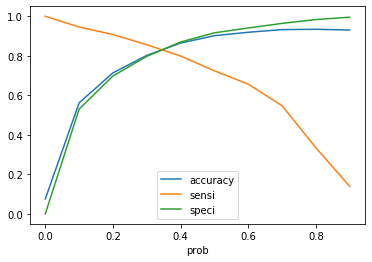

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Final Model

In [158]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final2['predicted'] = y_pred_final2.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final2.head()

mobile_number  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0              0      0    0.002700          0    1    0    0    0    0    0   
1              1      0    0.003821          0    1    0    0    0    0    0   
2              2      0    0.006592          0    1    0    0    0    0    0   
3              3      0    0.049233          0    1    0    0    0    0    0   
4              4      0    0.270892          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [159]:
y_pred_final2=y_pred_final2[['mobile_number','churn','Churn_Prob','predicted']]
y_pred_final2.head()

mobile_number  churn  Churn_Prob  predicted
0              0      0    0.002700          0
1              1      0    0.003821          0
2              2      0    0.006592          0
3              3      0    0.049233          0
4              4      0    0.270892          0

In [160]:
from sklearn import metrics
# Confusion matrix 
confusion_final = metrics.confusion_matrix( y_pred_final2.churn, y_pred_final2.predicted)
confusion_final

array([[7222, 1083],
       [ 137,  544]], dtype=int64)

In [161]:
# Predicted     not_churn    churn
# Actual
# not_churn     8266      39
# churn           617    64

In [162]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("sensitivity :",round(sensitivity*100,0),"%")
# Let us calculate specificity
specificity =TN / float(TN+FP)
print("specificity :",round(specificity*100,0),"%")
# Calculate false postive rate - predicting churn when customer does not have churned
false_positive_rate = FP/ float(TN+FP)
print("false positive rate :",round(false_positive_rate*100,0),"%")    

sensitivity : 80.0 %
specificity : 87.0 %
false positive rate : 13.0 %


In [163]:
# Accuracy 
total1=sum(sum(confusion_final))
print(total1)
accuracy = (TP+TN)/total1
print("Accuracy :",round(accuracy*100,0),"%")    
#print(accuracy)

8986
Accuracy : 86.0 %


In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

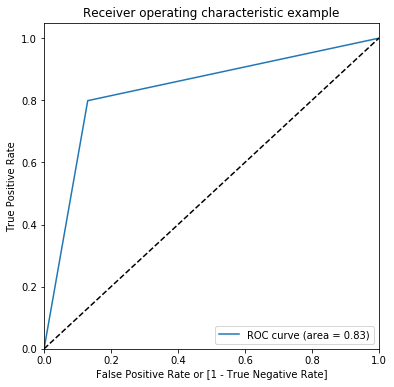

(array([0.        , 0.13040337, 1.        ]),
 array([0.        , 0.79882526, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [165]:
draw_roc(y_pred_final2.churn, y_pred_final2.predicted)

#### We understand that we can achieve an accuracy of 83% and Predict the churns with an accuracy of 75% through this model

***************
## NON PCA MODEL
This model is to understand the important factors and improve the interpretability of the model. We are going to use the logistic regression.

In [166]:
#We will now be building logistic regression model without PCA
#Underlying purpose of this is to achieve better interpretability so that we can communicate important features 
#....to the clients.

#First step that we'll do is make a copy of our dataset so that the same dataframe can be used later by Sai

high_value_customer_copy = high_value_customer.copy()

In [167]:
high_value_customer_copy_numeric = high_value_customer_copy.select_dtypes(include=['float64','int64'])
high_value_customer_copy_numeric  = high_value_customer_copy_numeric.set_index('mobile_number')
high_value_customer_copy_numeric.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7000701601           109             0.0             0.0             0.0   
7001524846           109             0.0             0.0             0.0   
7002124215           109             0.0             0.0             0.0   
7000887461           109             0.0             0.0             0.0   

                 arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
mobile_number                                                           
7000842753      197.385   214.816   213.803         0.00         0.00   
7000701601     1069.180  1349.850  3171.480        57.84        54.68   
7001524846      378.721   492.223   137.362       413.69       351.03   
7002124215      514.453   597.753   637.760       102.41       132.11   
7000887461       74.350   193.897   366.966        48.96        50.66   

               onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
mobile_number                                                          
7000842753            0.00          0.00          0.00          0.00   
7000701601           52.29        453.43        567.16        325.91   
7001524846           35.08         94.66         80.63        136.48   
7002124215           85.14        757.93        896.68        983.39   
7000887461           33.58         85.41         89.36        205.89   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                                                               
7000842753              0.00           0.00           0.00           0.00   
7000701601             16.23          33.49          31.64          23.74   
7001524846              0.00           0.00           0.00           0.00   
7002124215              0.00           0.00           0.00           0.00   
7000887461              0.00           0.00           0.00           0.00   

               roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                                                   
7000842753              0.00           0.00              0.00   
7000701601             12.59          38.06             51.39   
7001524846              0.00           0.00            297.13   
7002124215              0.00           0.00              4.48   
7000887461              0.00           0.00             48.96   

               loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601                31.38             40.28            308.63   
7001524846               217.59             12.49             80.96   
7002124215                 6.16             23.34             91.81   
7000887461                50.66             33.58             82.94   

               loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00              0.00   
7000701601               447.38            162.28             62.13   
7001524846                70.58             50.54              0.00   
7002124215                87.93            104.81              0.75   
7000887461                83.01            148.56              0.00   

               loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
mobile_number                                                         
7000842753                 0.00              0.00               0.0   
7000701601                55.14             53.23               0.0   
7001524846                 0.00              0.00               0.0   
7002124215                 0.00              1.58               0.0   
7000887461                 0.00              0.

In [168]:
#We will now be dividing the data into the test and train

from sklearn.model_selection import train_test_split
# Putting response variable to y
y = high_value_customer_copy_numeric['churn']
# Putting feature variable to X
X = high_value_customer_copy_numeric.drop(['churn'],axis=1)
y.head()

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int64

In [169]:
from sklearn.linear_model import LinearRegression,LogisticRegression
logreg = LogisticRegression()
lr = LinearRegression()

from sklearn.feature_selection import RFE

rfe = RFE(lr, 70)             
rfe = rfe.fit(X, y)

In [170]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [171]:
rfe.ranking_

array([104, 103, 101, 100,  52,  55,  53,  60,  37,  54,  80,  36,  65,
        41,  58,  57,  59,  35,  64,   1,  15,   1,   1,  14,   1,   1,
        16,   1,  32,  38,  43,   1,   1,   4,   1,   1,   1,   1,   1,
         1,   1,   1,   1,  99,  96,  98,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,  97, 102,  95,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,  29,  26,  25,  93,
        70,  66,  78,  47,  69,  71,  46,  42,  34,  27,  68,  48,  77,
        49,  56,  21,  31,  22,  28,  18,  45,  63,  67,  89,  75,  74,
        91,  87,  79,  76,  86,  50,  44,  62,  73,   7,  11,  17,   8,
        12,  40,  33,  20,  19,  61,  23,  30,  24,  13,  39,   5,   9,
         3,  81,  83,  90,  82,  51,  94,  85,  92,  84,  88,   2,   1,
         1,  72,  10,   6])

In [172]:
drop_columns = X.columns[~rfe.support_]
X = X.drop(drop_columns, axis=1)
high_value_customer_copy = high_value_customer_copy.drop(drop_columns, axis=1)

In [173]:
high_value_customer_copy.shape

(29953, 81)

In [174]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

loc_og_t2t_mou_6  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_8  \
0         -0.369385         -0.343476         -0.652678         -0.649478   
1         -0.144935         -0.166450          0.580783          0.044793   
2          0.928357         -0.288584         -0.329115         -0.433257   
3         -0.349818         -0.240899         -0.285753         -0.201077   
4         -0.155548         -0.195895         -0.321202         -0.013904   

   loc_og_t2f_mou_6  loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  \
0         -0.286747         -0.301900     -0.671633     -0.679653   
1          2.519590          2.425615      0.443598      0.741790   
2         -0.286747         -0.301900      0.327177      0.087577   
3         -0.252871         -0.220941     -0.415280     -0.429155   
4         -0.286747         -0.301900     -0.323163     -0.323753   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0         -0.410655         -0.413745         -0.373493         -0.438580   
1         -0.400011         -0.358485         -0.343304         -0.316641   
2         -0.122128         -0.097157         -0.316735         -0.405120   
3         -0.168244         -0.114929         -0.218176          1.187674   
4         -0.410655         -0.413745         -0.373493         -0.432812   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0         -0.433291         -0.384626         -0.150667         -0.140750   
1         -0.360077         -0.264487          0.404860          1.405035   
2         -0.410147         -0.199578         -0.150667         -0.140750   
3          1.431021          1.759453         -0.150667         -0.140750   
4         -0.418653         -0.287786         -0.150667         -0.140750   

   std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0         -0.145041     -0.570182     -0.568914     -0.504844     -0.047398   
1          1.379645     -0.470221     -0.451529     -0.377049     -0.047398   
2         -0.145041     -0.356233     -0.344768     -0.343491     -0.047398   
3         -0.145041      0.683507      0.891270      1.036431     -0.047398   
4         -0.145041     -0.566306     -0.558994     -0.439814     -0.047398   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0     -0.046270     -0.043625     -0.331367     -0.326467     -0.322777   
1     -0.042321      0.180077     -0.075379     -0.326467     -0.002416   
2     -0.046270     -0.043625     -0.331367     -0.326467      0.181421   
3     -0.046270     -0.043625     -0.331367     -0.326467     -0.322777   
4     -0.046050     -0.043625     -0.325678     -0.326467      0.550083   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0    -0.160927    -0.016037     -0.01739       -0.882649       -0.876202   
1    -0.160927    -0.016037     -0.01739       -0.177277       -0.027153   
2    -0.160927    -0.016037     -0.01739       -0.147140       -0.274632   
3    -0.160927    -0.016037     -0.01739        0.362115        0.557540   
4    -0.160927    -0.016037     -0.01739       -0.688225       -0.681040   

   total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
0       -0.787825         -0.399804         -0.398086         -0.393039   
1       -0.288006         -0.044973         -0.205510         -0.222309   
2       -0.542940         -0.254307         -0.339346         -0.392096   
3        0.737410         -0.384668         -0.337257         -0.271170   
4       -0.445991         -0.273410         -0.033709          0.087897   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
0         -0.686101         -0.694768         -0.661296         -0.333993   
1          0.305884          0.319548         -0.116813          2.989403   
2         -0.423560         -0.630746         -0.608504         -0.333993   
3         -0.147021         -0.352999         -0.079742  

In [175]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [176]:
X_train.shape

(20967, 70)

In [177]:
y_train.shape

(20967,)

In [178]:
X_test.shape

(8986, 70)

In [179]:
y_test.shape

(8986,)

In [180]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(class_weight='balanced')
lm = logistic.fit(X_train,y_train)

In [181]:
col = X_train.columns
y_pred = lm.predict_proba(X_test[col])
y_pred_df = pd.DataFrame(y_pred)
#Converting the array to the dataframe

In [182]:
y_pred_1 = y_pred_df.iloc[:,[1]]
y_test_df = pd.DataFrame(y_test)
y_test_df['mobile_number'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

churn  mobile_number
0      0     7000109958
1      0     7001501307
2      0     7000870553
3      0     7002362705
4      0     7002044200

In [183]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final= y_pred_final.rename(columns={ "churn" : 'Churn'})
y_pred_final.head()

Churn  mobile_number  Churn_Prob
0      0     7000109958    0.027392
1      0     7001501307    0.015387
2      0     7000870553    0.062991
3      0     7002362705    0.260378
4      0     7002044200    0.344668

In [184]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

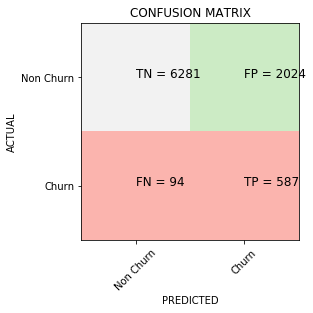

In [185]:
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted)
plot_confusion_matrix(confusion)

In [186]:
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.764300022256844

In [187]:
metrics.recall_score(y_pred_final.Churn, y_pred_final.predicted)

0.8619676945668135

In [188]:
#Now we will look into couple of metrics
#True positive
TP = confusion[1,1] 

#True negatives
TN = confusion[0,0] 

#False positives
FP = confusion[0,1] 

#False negatives
FN = confusion[1,0] 

print(TN / float(TN+FP))
print(FP/ float(TN+FP))

0.7562913907284768
0.24370860927152319


In [189]:
#Now earlier we had assumed the cutoff probability as 0.5
#Let's now look at different levels of cutoff and the respective probability

num_range = [float(x)/10 for x in range(10)]
for i in num_range:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

Churn  mobile_number  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0     7000109958    0.027392          0    1    0    0    0    0    0   
1      0     7001501307    0.015387          0    1    0    0    0    0    0   
2      0     7000870553    0.062991          0    1    0    0    0    0    0   
3      0     7002362705    0.260378          0    1    1    1    0    0    0   
4      0     7002044200    0.344668          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [190]:
#Let us know understand different parameters associated 
cutoff = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

In [191]:
cutoff_list_of_numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for numbers in cutoff_list_of_numbers:
    confusion_matix = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[numbers] )
    sum_of_confusion_matrix=sum(sum(confusion_matix))
    accuracy = (confusion_matix[0,0]+confusion_matix[1,1])/sum_of_confusion_matrix
    
    specificity = confusion_matix[0,0]/(confusion_matix[0,0]+confusion_matix[0,1])
    sensitivity = confusion_matix[1,1]/(confusion_matix[1,0]+confusion_matix[1,1])
    cutoff.loc[numbers] =[ numbers ,accuracy, sensitivity, specificity]
print(cutoff)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.075785     1.000000     0.000000
0.1          0.1  0.344759     0.966226     0.293799
0.2          0.2  0.459381     0.947137     0.419386
0.3          0.3  0.568217     0.917768     0.539554
0.4          0.4  0.665591     0.888399     0.647321
0.5          0.5  0.764300     0.861968     0.756291
0.6          0.6  0.863232     0.772394     0.870680
0.7          0.7  0.912197     0.553598     0.941601
0.8          0.8  0.921767     0.374449     0.966647
0.9          0.9  0.930336     0.223201     0.988320


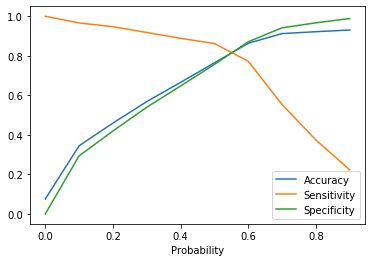

In [192]:
cutoff.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])

In [193]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.58 else 0)
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.8414199866458936

In [194]:
metrics.recall_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.8046989720998532

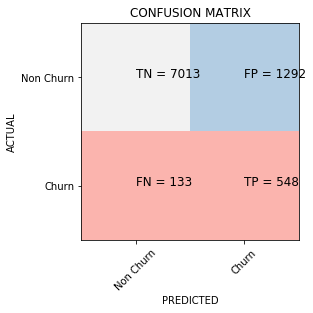

In [195]:
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
plot_confusion_matrix(confusion)

### LASSO REGRESSION TO PREDICT THE GOOD PREDICTORS

In [196]:
lr = LogisticRegression(C=0.001, class_weight='balanced', penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

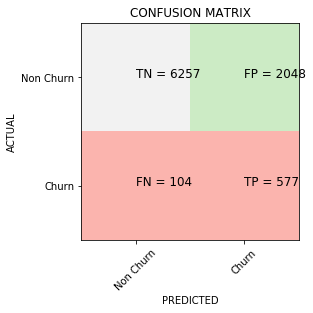

In [197]:
confusion = metrics.confusion_matrix(y_test, lr.predict(X_test))
plot_confusion_matrix(confusion)

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8305
           1       0.22      0.85      0.35       681

    accuracy                           0.76      8986
   macro avg       0.60      0.80      0.60      8986
weighted avg       0.93      0.76      0.82      8986



In [199]:
selected_features=[]

counter = 0

for col in X_train.columns.tolist():
    if(abs(lr.coef_[0][counter]) > 0.1):
        print(str(lr.coef_[0][counter]),'-',col)
        selected_features.append(col)
    counter+=1

-0.18096389401375843 - loc_og_t2t_mou_8
-0.3060151760642237 - loc_og_t2m_mou_8
-0.11153381008946049 - std_og_t2t_mou_8
-0.14464930232755177 - std_og_t2m_mou_8
0.1009352453982608 - std_og_mou_6
-0.17126395448773207 - std_og_mou_8
-0.1053647325296384 - spl_og_mou_8
0.10974692444728343 - total_og_mou_7
-0.3188656176575257 - total_og_mou_8
-0.21646231093505386 - loc_ic_t2t_mou_8
-0.36664239875077825 - loc_ic_t2m_mou_8
-0.12502555630913814 - loc_ic_t2f_mou_8
-0.384719614770805 - loc_ic_mou_8
-0.10822719793653889 - std_ic_mou_8
-0.3805494617246794 - total_ic_mou_8
-0.309583795292739 - spl_ic_mou_8
-0.2315458252651763 - recharge_call_flag_8


In [200]:
selected_features

['loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'recharge_call_flag_8']

#### PREDICTING IMPORTANT FEATURES USING XGBOOST

In [201]:
# fit model on training data with default hyperparameters
import xgboost as xgb
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
y_pred = xgb_classifier.predict_proba(X_test)
y_pred[:10]

array([[9.8670632e-01, 1.3293681e-02],
       [9.9626917e-01, 3.7308589e-03],
       [9.9901688e-01, 9.8310516e-04],
       [9.9923962e-01, 7.6036080e-04],
       [9.8219287e-01, 1.7807141e-02],
       [9.8565632e-01, 1.4343662e-02],
       [9.9820763e-01, 1.7923872e-03],
       [9.9983782e-01, 1.6216298e-04],
       [9.9769282e-01, 2.3071857e-03],
       [9.9951726e-01, 4.8275563e-04]], dtype=float32)

In [203]:
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 87.81%


In [204]:
##Trying to tune parameters using K-Fold CV
folds = 3

# specify range of hyperparameters
param_grid = {"learning_rate"    : [0.10, 0.20, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "subsample": [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs=-1)

In [205]:
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 22.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimato...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [206]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_resultscv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        14.163230      0.307228         0.094651    1.705753e-03   
1        20.226866      0.298953         0.096016    3.553840e-03   
2        23.357122      1.051282         0.091997    1.101936e-02   
3        13.735839      0.468327         0.098155    9.291708e-03   
4        20.980337      0.519238         0.101672    1.563098e-02   
5        22.892997      0.074737         0.088333    3.404083e-03   
6        14.426308      0.577635         0.105495    1.024459e-02   
7        20.006383      0.487723         0.085011    3.289216e-03   
8        22.013972      0.302311         0.084994    4.300543e-03   
9        13.675535      0.230362         0.089346    1.703321e-03   
10       18.859315      0.468609         0.090036    4.591866e-03   
11       21.627652      0.436762         0.085989    6.372856e-03   
12       17.900978      0.362002         0.117362    7.149064e-03   
13       26.146978      0.542991         0.108345    6.202619e-03   
14       29.281963      0.548567         0.104520    3.484674e-03   
15       17.260663      0.473748         0.112508    2.491220e-03   
16       25.893285      0.387692         0.105181    3.989144e-03   
17       29.760345      1.104075         0.117336    1.570964e-02   
18       17.641001      0.253860         0.117345    7.744885e-03   
19       26.330630      0.405907         0.144374    6.658373e-03   
20       29.554640      0.877926         0.103494    2.472920e-03   
21       17.785968      0.688761         0.122671    1.664846e-02   
22       24.771787      0.478650         0.104338    3.311841e-03   
23       29.026397      0.607385         0.114012    8.852421e-03   
24       21.658318      0.272458         0.170663    3.382307e-02   
25       31.814917      0.584038         0.147993    8.299635e-03   
26       36.603527      0.572746         0.150150    4.101437e-03   
27       20.711335      0.103629         0.135499    2.535528e-03   
28       31.951657      0.724746         0.146003    2.144315e-03   
29       37.314845      0.123652         0.143816    5.112465e-03   
30       21.558336      0.427908         0.154014    1.558492e-02   
31       31.972008      0.364627         0.159300    9.719744e-03   
32       36.376631      0.530592         0.131003    5.704005e-03   
33       21.194627      0.221994         0.139165    1.572106e-03   
34       32.012609      0.301584         0.144006    7.775676e-03   
35       36.925677      0.431048         0.184951    2.533707e-02   
36       27.479627      0.253315         0.200669    8.642065e-03   
37       41.547986      0.413709         0.184330    8.986745e-03   
38       46.848644      0.327714         0.180008    1.209291e-02   
39       26.030331      0.277247         0.184658    4.505973e-03   
40       38.389590      0.453048         0.183670    1.188213e-02   
41       42.459945      0.258537         0.159357    4.641363e-03   
42       23.817666      0.142652         0.160413    8.871136e-03   
43       36.314978      0.466262         0.188357    9.392480e-03   
44       42.817647      0.402897         0.172348    1.827773e-02   
45       22.317307      0.491218         0.152327    4.993525e-03   
46       35.279615      0.077737         0.153013    2.170460e-03   
47       42.153981      0.351306         0.152311    6.588357e-03   
48       33.451714      0.587664         0.265987    4.435847e-02   
49       50.484593      0.928174         0.282689    5.659721e-02   
50       58.421134      0.388263         0.245669    2.776004e-02   
51       30.453594      0.202388         0.228669    1.507386e-02   
52       48.196640      1.798818         0.219987    1.199242e-02   
53       55.083970      0.237094         0.205642    5.805447e-03   
54       28.053296      0.604560         0.176004    4.250382e-03   
55       45.862631      0.427057         0.183847    6.042790e-04   
56       53.854147      0.628346         0.224981    1.284508e-02   
57 

In [207]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.9}

In [208]:
#Let's build the model again using the above best parameters

params = {'learning_rate': 0.1,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.90,
         'objective':'binary:logistic'}

model = XGBClassifier(params = params)
model.fit(X_train, y_train)

[22:49:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [209]:
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.8670632e-01, 1.3293681e-02],
       [9.9626917e-01, 3.7308589e-03],
       [9.9901688e-01, 9.8310516e-04],
       [9.9923962e-01, 7.6036080e-04],
       [9.8219287e-01, 1.7807141e-02],
       [9.8565632e-01, 1.4343662e-02],
       [9.9820763e-01, 1.7923872e-03],
       [9.9983782e-01, 1.6216298e-04],
       [9.9769282e-01, 2.3071857e-03],
       [9.9951726e-01, 4.8275563e-04]], dtype=float32)

In [210]:
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8780671905624498

In [211]:
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'loc_og_t2t_mou_6': 0.0092849005,
 'loc_og_t2t_mou_8': 0.009969034,
 'loc_og_t2m_mou_6': 0.008934411,
 'loc_og_t2m_mou_8': 0.010042146,
 'loc_og_t2f_mou_6': 0.008144657,
 'loc_og_t2f_mou_8': 0.01129367,
 'loc_og_mou_6': 0.00861278,
 'loc_og_mou_7': 0.008986541,
 'std_og_t2t_mou_6': 0.008437414,
 'std_og_t2t_mou_7': 0.009340436,
 'std_og_t2t_mou_8': 0.010199448,
 'std_og_t2m_mou_6': 0.008478008,
 'std_og_t2m_mou_7': 0.011942827,
 'std_og_t2m_mou_8': 0.0074299583,
 'std_og_t2f_mou_6': 0.0077695157,
 'std_og_t2f_mou_7': 0.009732144,
 'std_og_t2f_mou_8': 0.01016997,
 'std_og_mou_6': 0.011969782,
 'std_og_mou_7': 0.012894593,
 'std_og_mou_8': 0.013240674,
 'isd_og_mou_6': 0.0062161116,
 'isd_og_mou_7': 0.013360052,
 'isd_og_mou_8': 0.010332845,
 'spl_og_mou_6': 0.008050418,
 'spl_og_mou_7': 0.0085034445,
 'spl_og_mou_8': 0.009367243,
 'og_others_6': 0.007220293,
 'og_others_7': 0.0,
 'og_others_8': 0.0,
 'total_og_mou_6': 0.010406647,
 'total_og_mou_7': 0.0113455895,
 'total_og_mou_8': 0.0

In [212]:
d = sorted(importance, key=importance.get, reverse=True)
d

['total_ic_mou_8',
 'loc_ic_mou_8',
 'recharge_call_flag_8',
 'spl_ic_mou_8',
 'loc_ic_mou_7',
 'total_ic_mou_6',
 'loc_ic_t2m_mou_8',
 'total_og_mou_8',
 'std_ic_t2f_mou_8',
 'isd_og_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_mou_8',
 'total_ic_mou_7',
 'std_og_mou_7',
 'loc_ic_t2m_mou_7',
 'std_og_mou_6',
 'std_og_t2m_mou_7',
 'loc_ic_t2t_mou_8',
 'std_ic_t2t_mou_8',
 'spl_ic_mou_7',
 'total_og_mou_7',
 'loc_og_t2f_mou_8',
 'loc_ic_mou_6',
 'ic_others_8',
 'loc_ic_t2t_mou_7',
 'std_ic_t2t_mou_7',
 'total_og_mou_6',
 'loc_ic_t2m_mou_6',
 'isd_og_mou_8',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'std_og_t2t_mou_8',
 'std_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'std_og_t2f_mou_7',
 'std_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'std_ic_mou_7',
 'spl_og_mou_8',
 'std_og_t2t_mou_7',
 'loc_og_t2t_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2m_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_og_mou_7',
 'loc_og_t2m_mou_6',
 'isd_ic_mou_6',
 'std_ic_t2t_mou_6',
 'ic_others_7',
 'isd_ic_mou_7',
 'loc_og_mou_6'

### CONCLUSION

For non-PCA we have performed two kind of modelling i.e Logistic Regression and XGBoost and the importance features from the same as follows.

From Logistic regression we observe that following features are important,</br>
   - loc_og_t2t_mou_8
   - loc_og_t2m_mou_8
   - std_og_t2t_mou_8
   - std_og_t2m_mou_8
   - std_og_mou_6
   - std_og_mou_8
   - spl_og_mou_8
   - total_og_mou_7
   - total_og_mou_8
   - loc_ic_t2t_mou_8
   - loc_ic_t2m_mou_8
   - loc_ic_t2f_mou_8
   - loc_ic_mou_8
   - std_ic_mou_8
   - total_ic_mou_8
   - spl_ic_mou_8
   - recharge_call_flag_8

Using the XGBoost, we observe that following features are important,
 - total_ic_mou_8
 - loc_ic_mou_8
 - recharge_call_flag_8
 - spl_ic_mou_8
 - loc_ic_mou_7
 - total_ic_mou_6
 - loc_ic_t2m_mou_8
 - total_og_mou_8
 - std_ic_t2f_mou_8
 - isd_og_mou_7
 - loc_ic_t2f_mou_8
 - std_og_mou_8
 - total_ic_mou_7
 - std_og_mou_7
 - loc_ic_t2m_mou_7

### FINAL BUSINESS RECOMMENDATIONS

We can make the below recommendations to the business,

    1.The comparison of various models with respect to Predicting the Churn we understand that Logistic regression (PCA +  data treated for class imbalance ) gives better result -86% than Adaboost with random forest classifier (80%) we therefoere recommend to use the Logistic regression for predictions.
    2.We understand the following paramaters have to be traked for identifying customer who are going to be churn in subsequent months
            a. Incoming calls received on the mobile - in the action phase months of 8 and 7
            b. Call recharges done in action phase - months of 8 and 7 in the same priority
            c. Total outgoing calls - MOU - in the action phase months of 8 and 7 in the same order